## PROSES DATA

Start From
Month : 15 May 2025 - 8 June 2025 

--- ---

# 1. LIBRARY IMPORT

In [1]:
import os
import json
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score
from collections import Counter

# 2. LOAD DATA

In [2]:
try:
    df = pd.read_csv("dataset/Dataset1_id.csv")
    print("File loaded successfully.")
except FileNotFoundError:
    print("File Dataset1_id.csv tidak ditemukan.")
    exit()

target_col = 'prognosis'


File loaded successfully.


# 3. DATA UNDERSTANDING

In [3]:
print("\n=== INFO DATA ===")
print(df.info())



=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, gatal to tidak_bernama
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


In [4]:
print("\n=== DESKRIPSI DATA NUMERIK ===")
print(df.describe())


=== DESKRIPSI DATA NUMERIK ===
             gatal   ruam_kulit  bintil_pada_kulit  bersin_terus_menerus  \
count  4920.000000  4920.000000        4920.000000           4920.000000   
mean      0.137805     0.159756           0.021951              0.045122   
std       0.344730     0.366417           0.146539              0.207593   
min       0.000000     0.000000           0.000000              0.000000   
25%       0.000000     0.000000           0.000000              0.000000   
50%       0.000000     0.000000           0.000000              0.000000   
75%       0.000000     0.000000           0.000000              0.000000   
max       1.000000     1.000000           1.000000              1.000000   

         menggigil      meriang  nyeri_sendi  sakit_perut  asam_lambung  \
count  4920.000000  4920.000000  4920.000000  4920.000000   4920.000000   
mean      0.021951     0.162195     0.139024     0.045122      0.045122   
std       0.146539     0.368667     0.346007     0.207593 

In [5]:
print("\n=== TIPE DATA KOLOM ===")
print(df.dtypes)


=== TIPE DATA KOLOM ===
gatal                             int64
ruam_kulit                        int64
bintil_pada_kulit                 int64
bersin_terus_menerus              int64
menggigil                         int64
                                 ...   
lepuh                             int64
luka_merah_di_sekitar_hidung      int64
cairan_kerak_kuning               int64
prognosis                        object
tidak_bernama                   float64
Length: 134, dtype: object


In [6]:
print("\n=== DISTRIBUSI KELAS TARGET ===")
print(df[target_col].value_counts())


=== DISTRIBUSI KELAS TARGET ===
prognosis
Infeksi jamur                             120
Alergi                                    120
GERD                                      120
Kolestasis kronis                         120
Reaksi obat                               120
Peptik Ulcer Diseae                       120
AIDS                                      120
Diabetes                                  120
Gastroenteritis                           120
Asma bronkial                             120
Hipertensi                                120
Migrain                                   120
Spondylosis serviks                       120
Kelumpuhan (perdarahan otak)              120
Penyakit kuning                           120
Malaria                                   120
Cacar air                                 120
Demam berdarah                            120
Penyakit tipus                            120
Hepatitis A                               120
Hepatitis B.                         

In [7]:
print("\n=== CHECK KELAS DENGAN < 2 SAMPEL ===")
counts = df[target_col].value_counts()
rare_classes = counts[counts < 2].index
print(rare_classes)


=== CHECK KELAS DENGAN < 2 SAMPEL ===
Index([], dtype='object', name='prognosis')


In [8]:
print("\n=== KOLOM DATA ===")
print(df.columns)


=== KOLOM DATA ===
Index(['gatal', 'ruam_kulit', 'bintil_pada_kulit', 'bersin_terus_menerus',
       'menggigil', 'meriang', 'nyeri_sendi', 'sakit_perut', 'asam_lambung',
       'sariawan_di_lidah',
       ...
       'koreng', 'kulit_mengelupas', 'serpihan_seperti_perak',
       'lekukan_kecil_di_kuku', 'kuku_meradang', 'lepuh',
       'luka_merah_di_sekitar_hidung', 'cairan_kerak_kuning', 'prognosis',
       'tidak_bernama'],
      dtype='object', length=134)


In [9]:
print("\n=== SAMPLE DATA ===")
print(df.head())



=== SAMPLE DATA ===
   gatal  ruam_kulit  bintil_pada_kulit  bersin_terus_menerus  menggigil  \
0      1           1                  1                     0          0   
1      0           1                  1                     0          0   
2      1           0                  1                     0          0   
3      1           1                  0                     0          0   
4      1           1                  1                     0          0   

   meriang  nyeri_sendi  sakit_perut  asam_lambung  sariawan_di_lidah  ...  \
0        0            0            0             0                  0  ...   
1        0            0            0             0                  0  ...   
2        0            0            0             0                  0  ...   
3        0            0            0             0                  0  ...   
4        0            0            0             0                  0  ...   

   koreng  kulit_mengelupas  serpihan_seperti_perak  

In [10]:
# Cek missing values
print("\n=== MISSING VALUES PER KOLOM ===")
print(df.isnull().sum())


=== MISSING VALUES PER KOLOM ===
gatal                              0
ruam_kulit                         0
bintil_pada_kulit                  0
bersin_terus_menerus               0
menggigil                          0
                                ... 
lepuh                              0
luka_merah_di_sekitar_hidung       0
cairan_kerak_kuning                0
prognosis                          0
tidak_bernama                   4920
Length: 134, dtype: int64


# Visualisasi Data Understanding

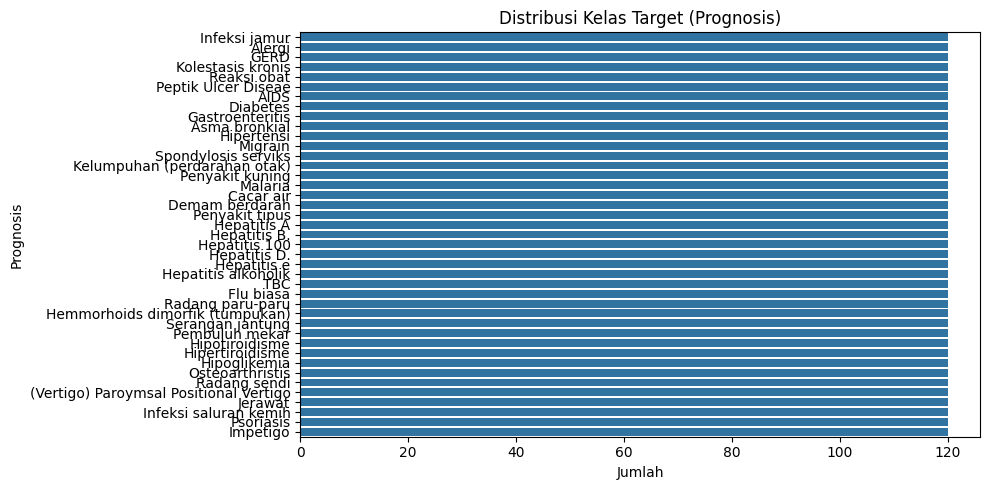

In [11]:
# 3.1 Distribusi kelas target
plt.figure(figsize=(10, 5))
sns.countplot(y=target_col, data=df, order=df[target_col].value_counts().index)
plt.title('Distribusi Kelas Target (Prognosis)')
plt.xlabel('Jumlah')
plt.ylabel('Prognosis')
plt.tight_layout()
plt.show()

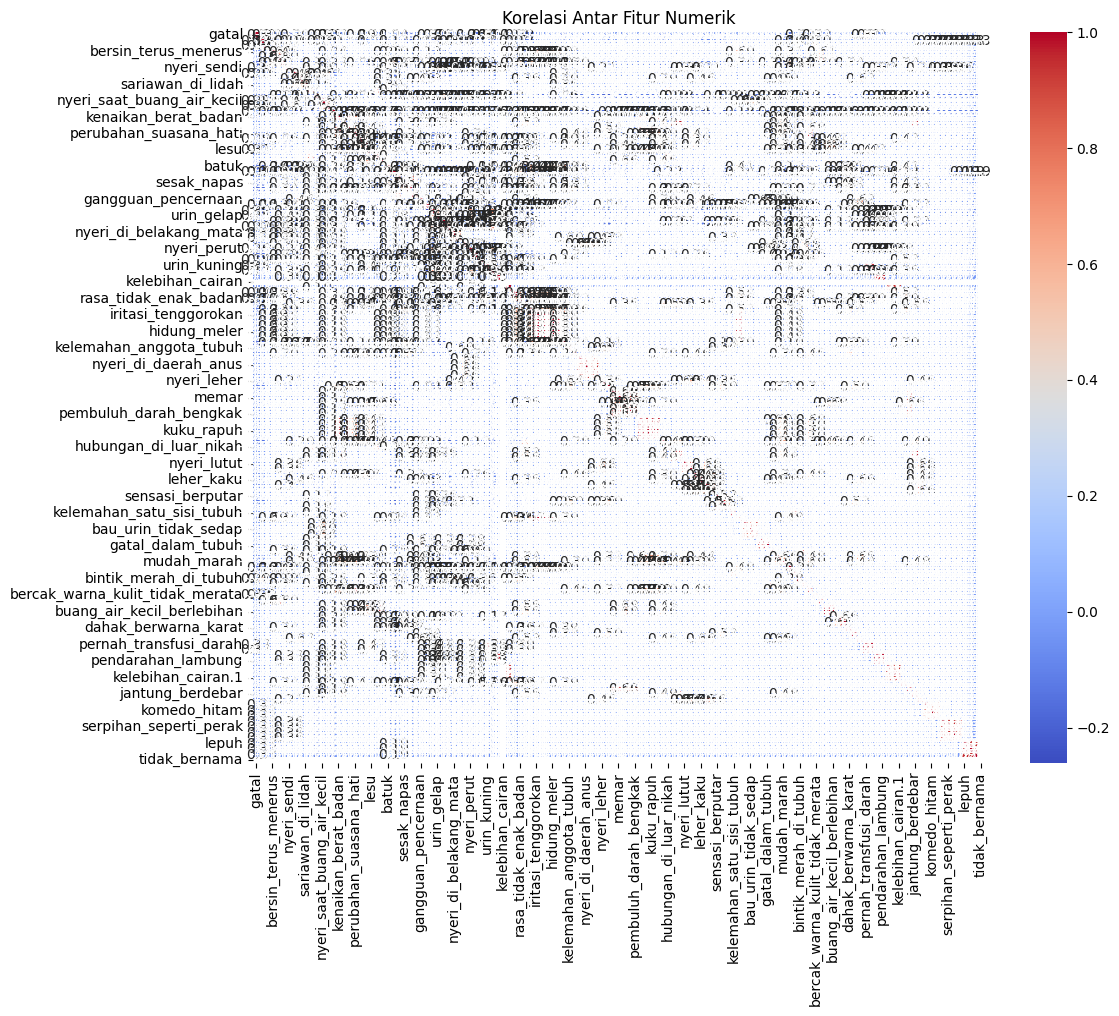

In [12]:
# 3.2 Korelasi fitur numerik (jika ada)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) >= 2:
    plt.figure(figsize=(12, 10))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Korelasi Antar Fitur Numerik')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak cukup fitur numerik untuk membuat heatmap korelasi.")


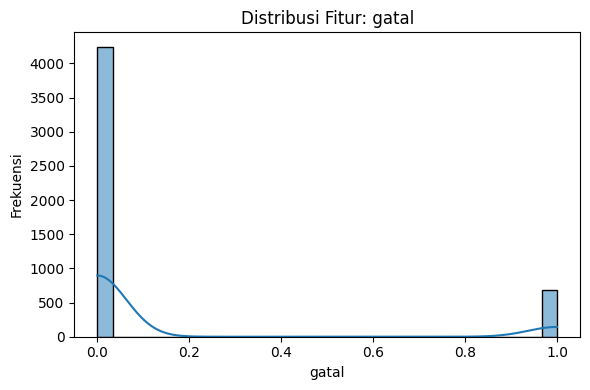

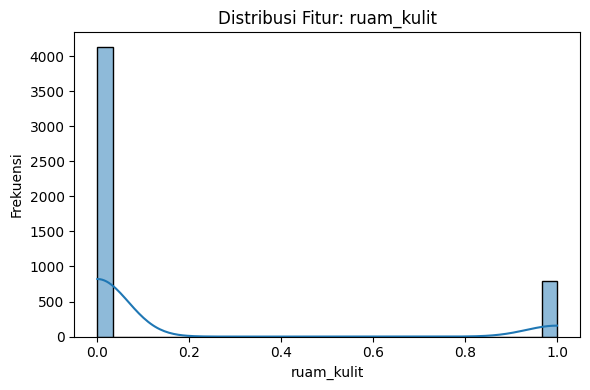

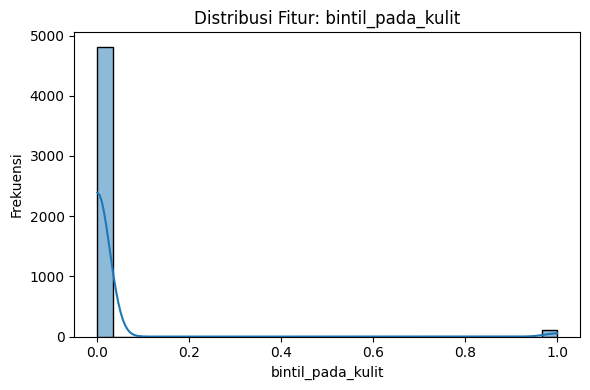

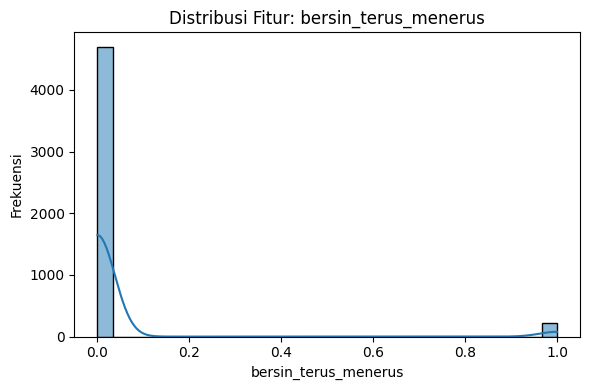

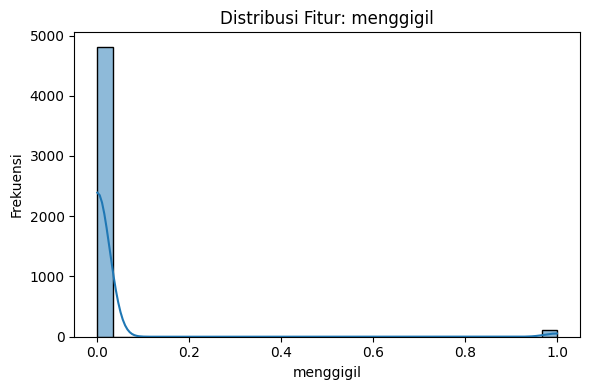

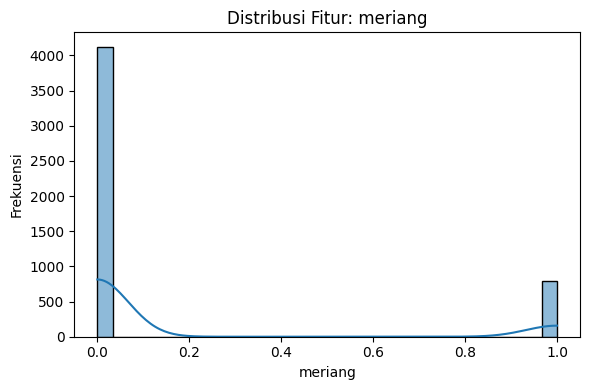

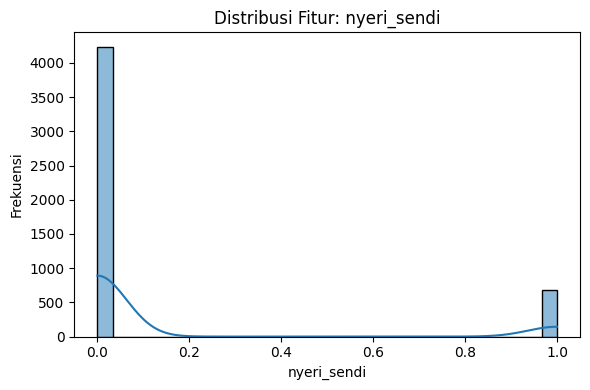

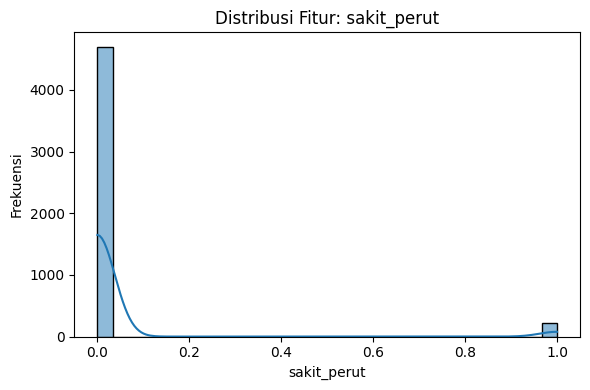

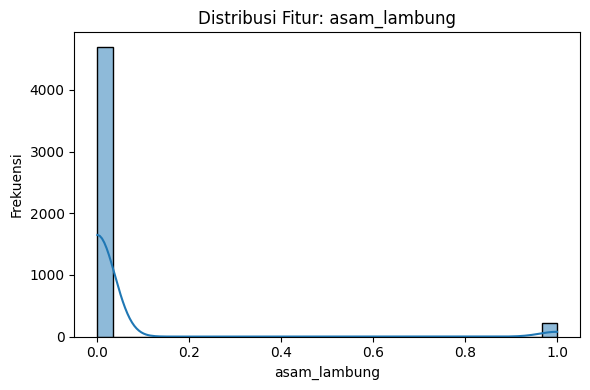

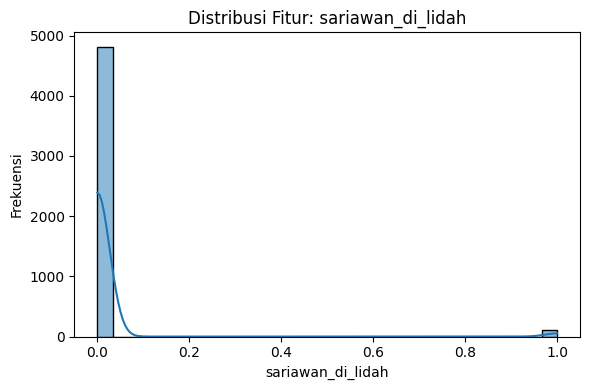

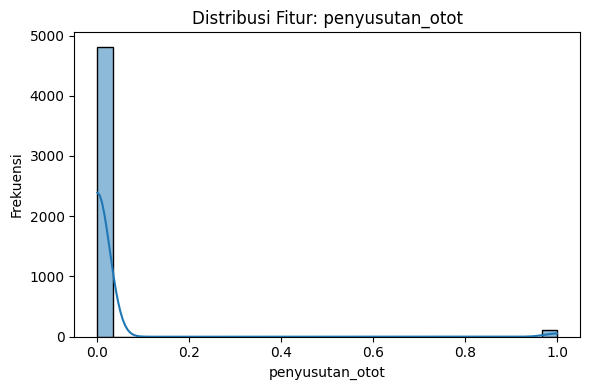

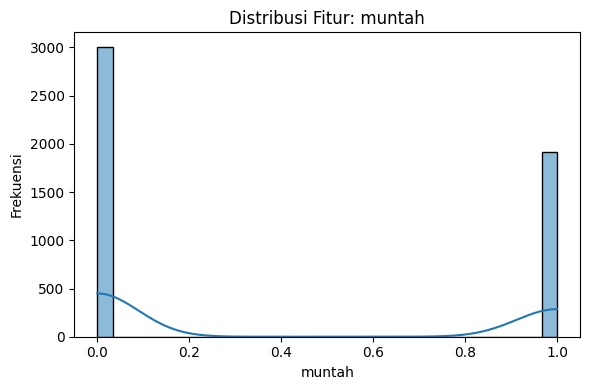

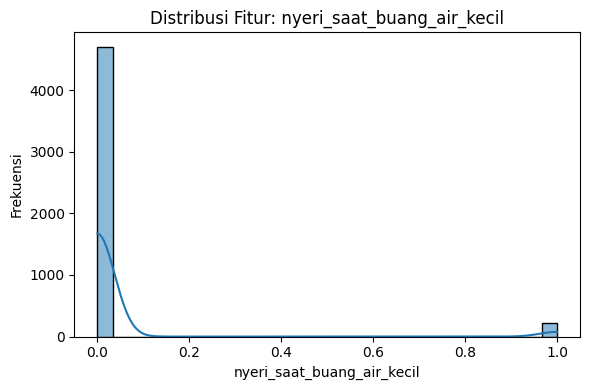

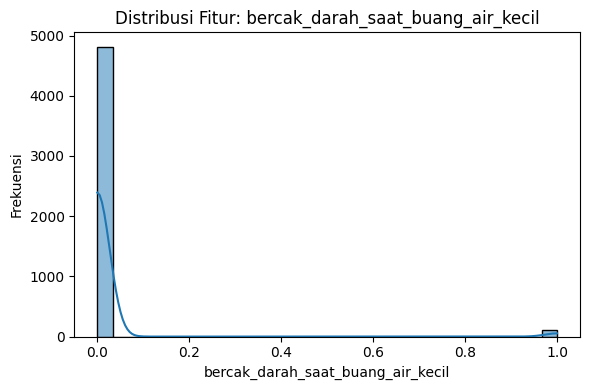

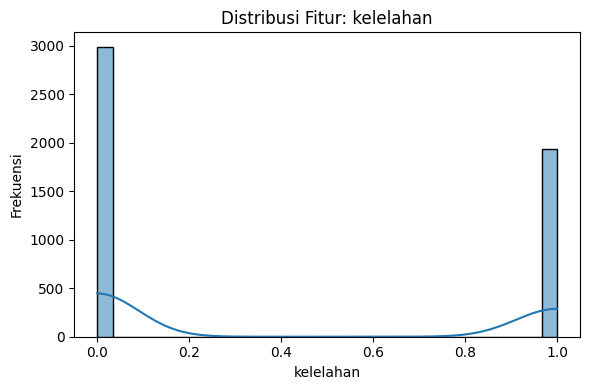

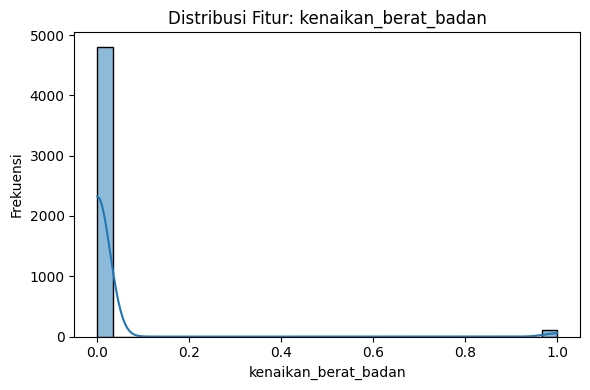

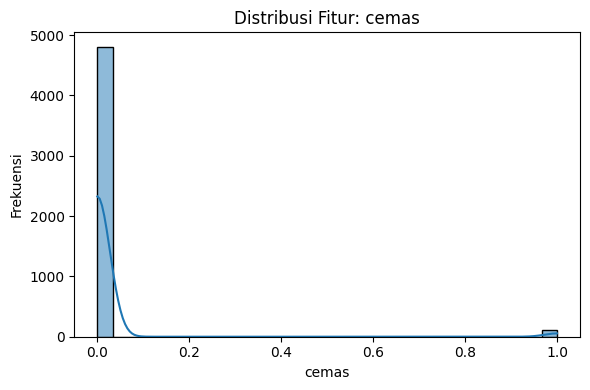

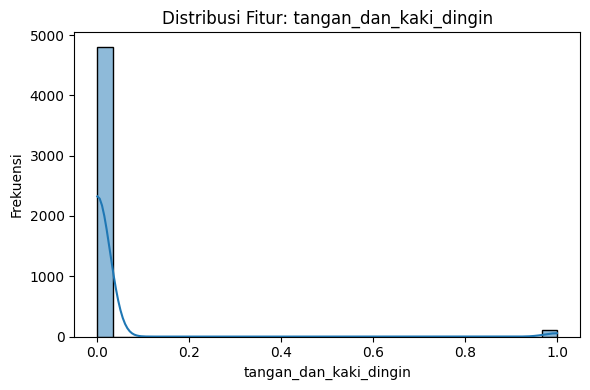

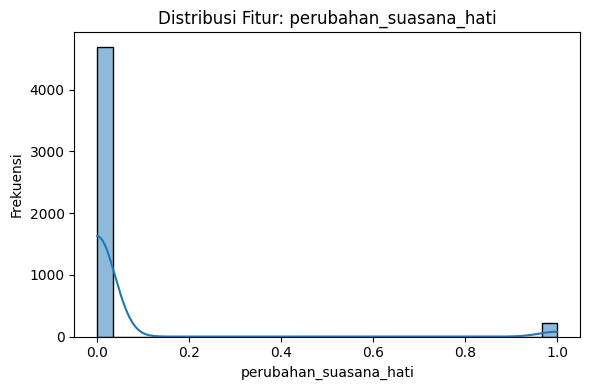

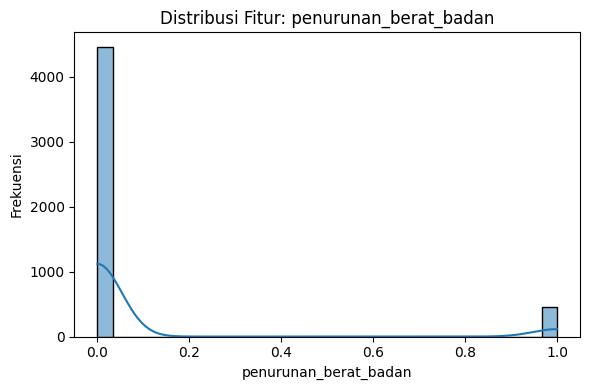

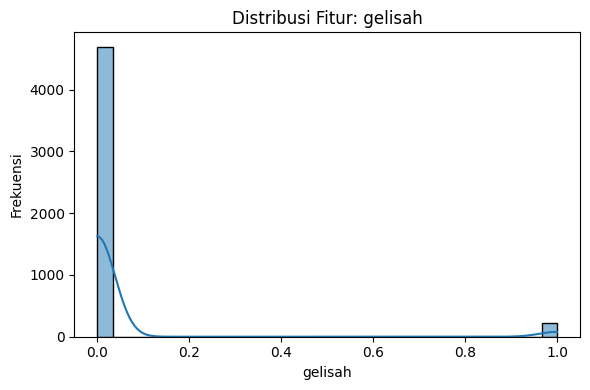

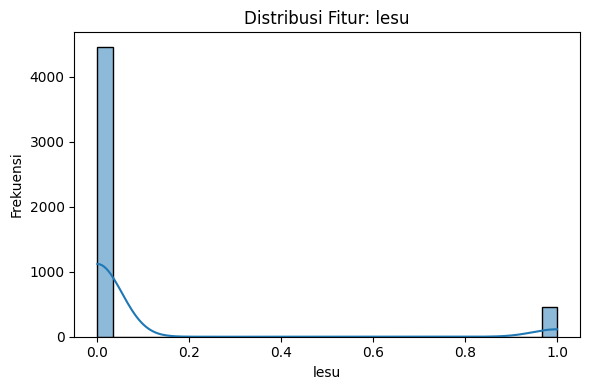

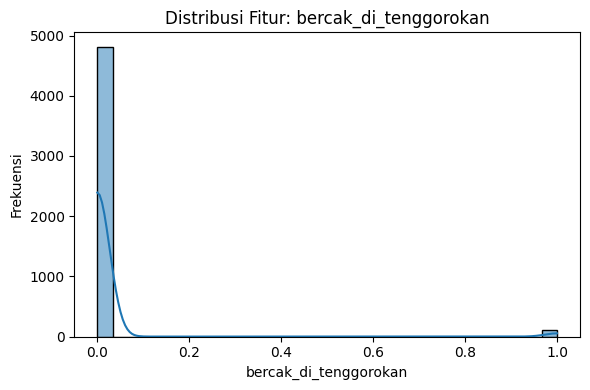

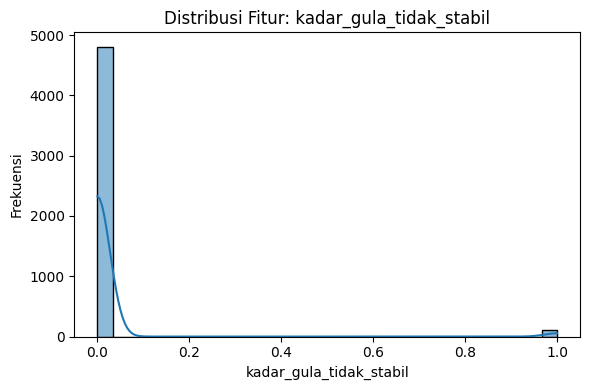

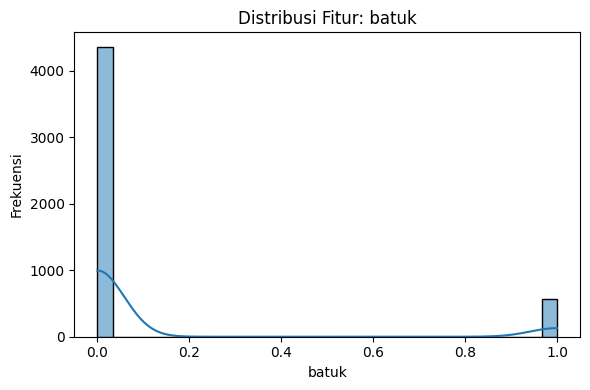

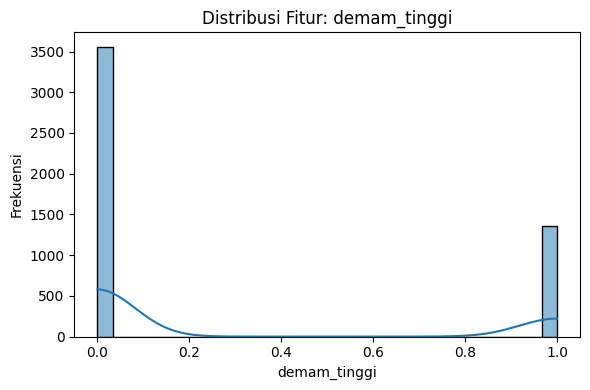

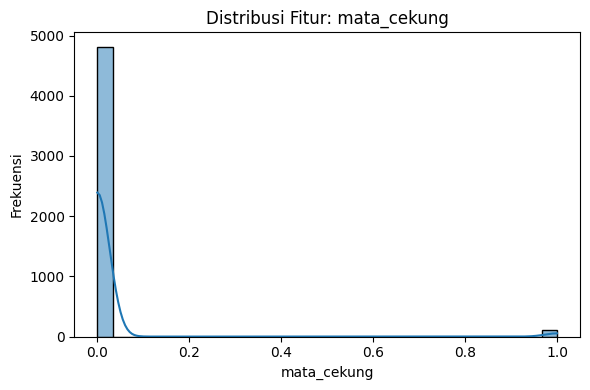

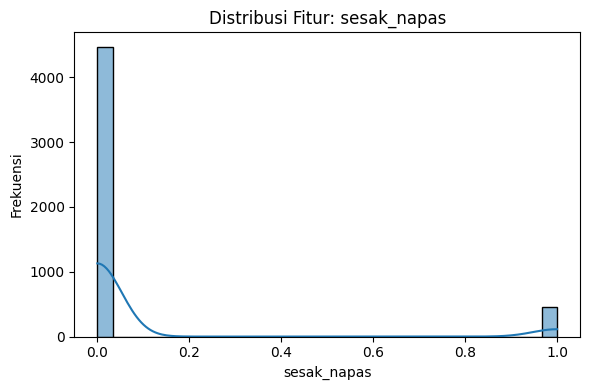

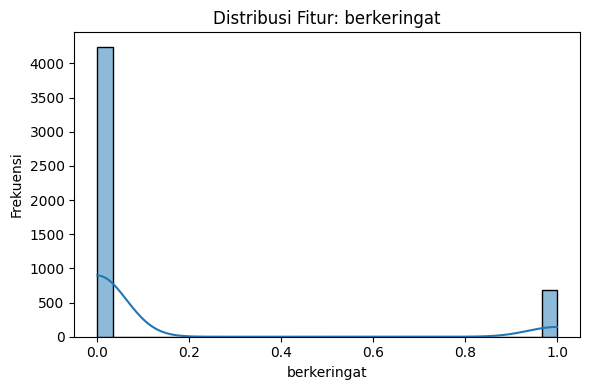

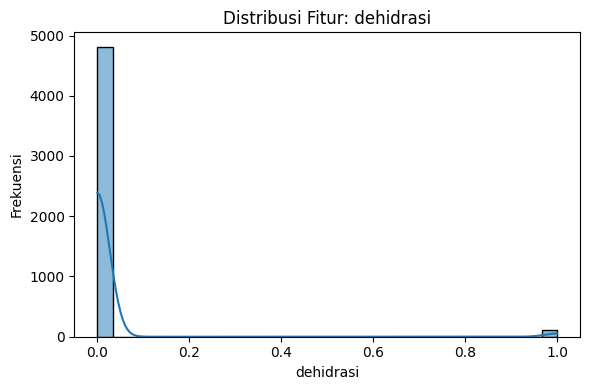

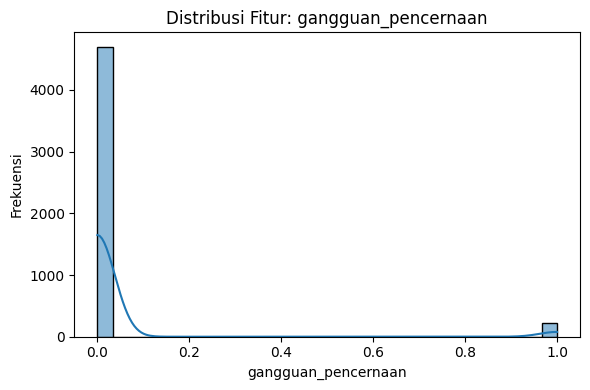

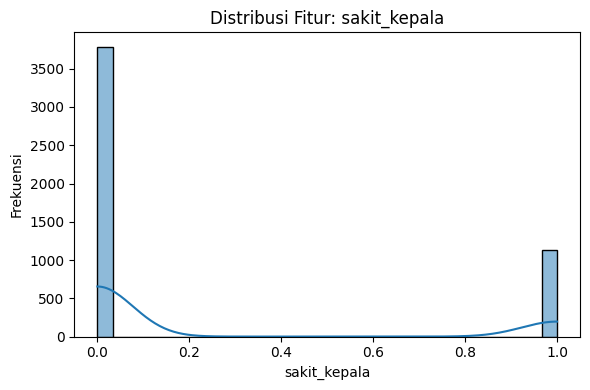

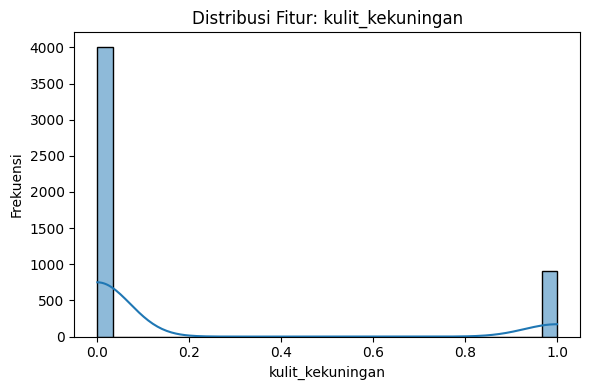

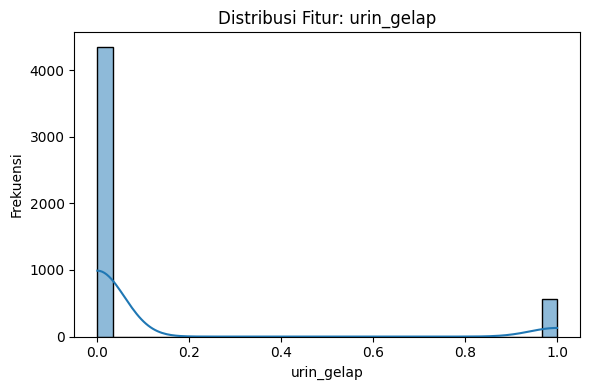

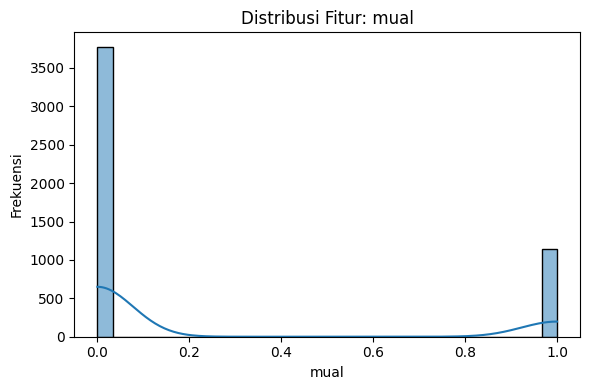

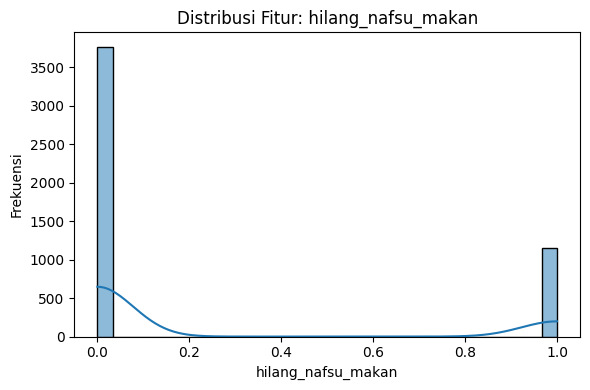

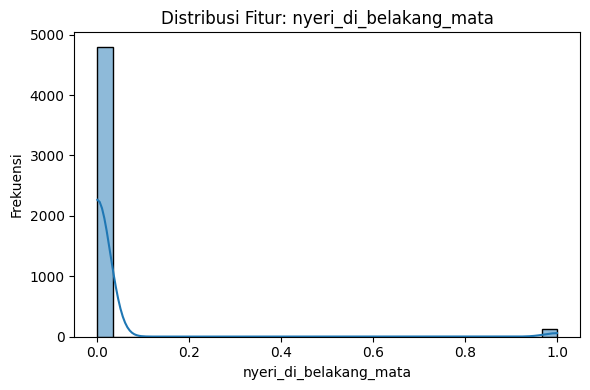

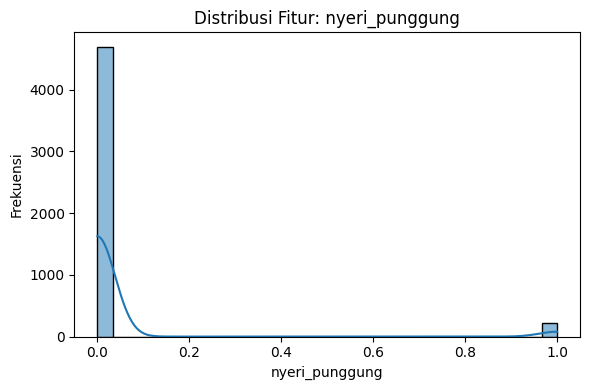

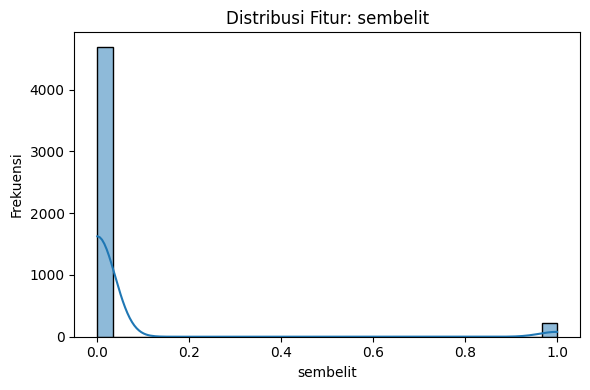

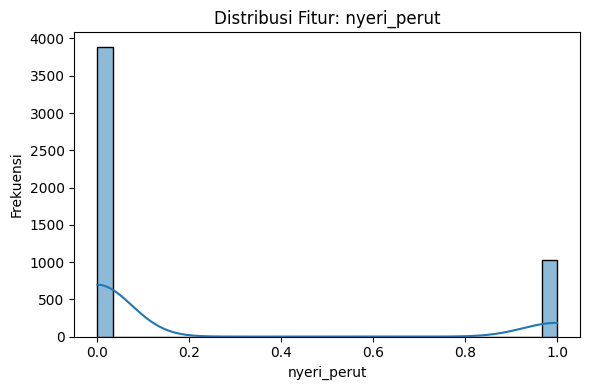

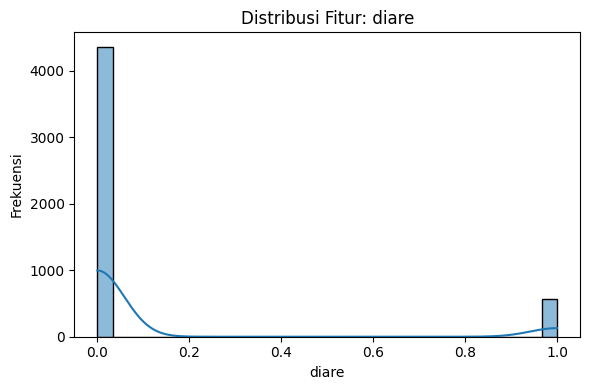

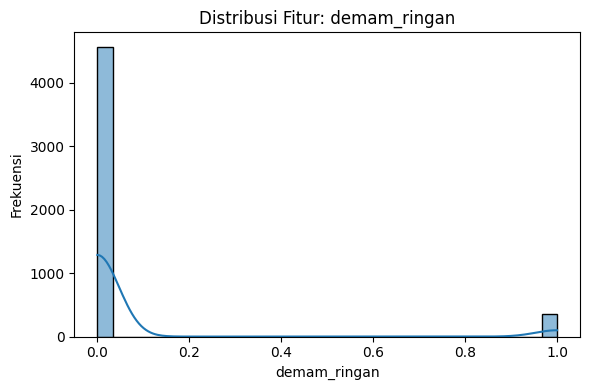

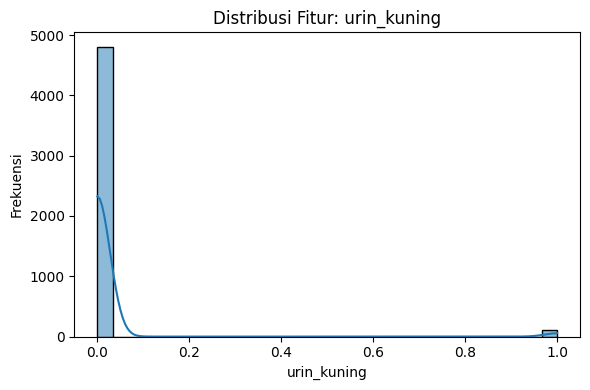

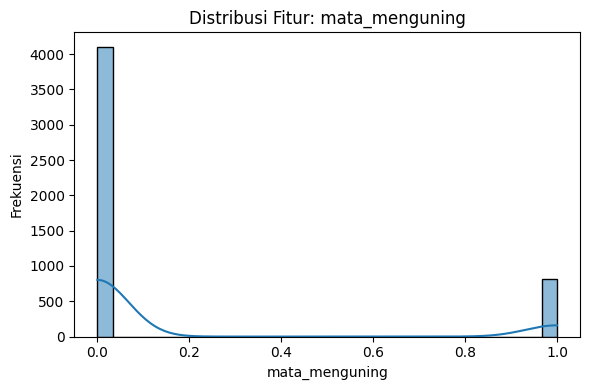

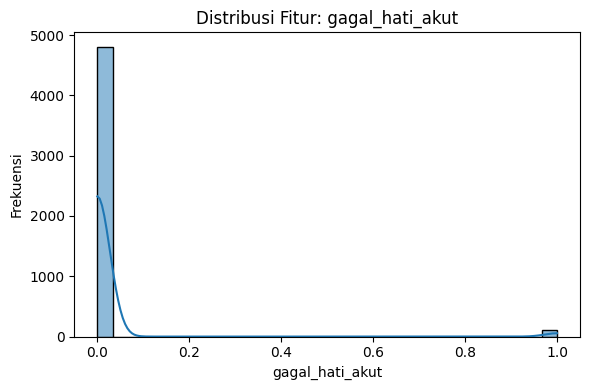

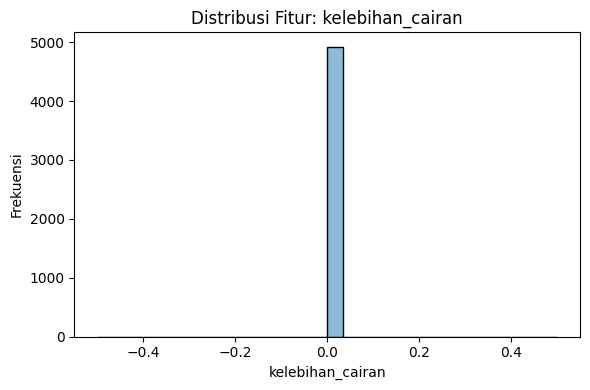

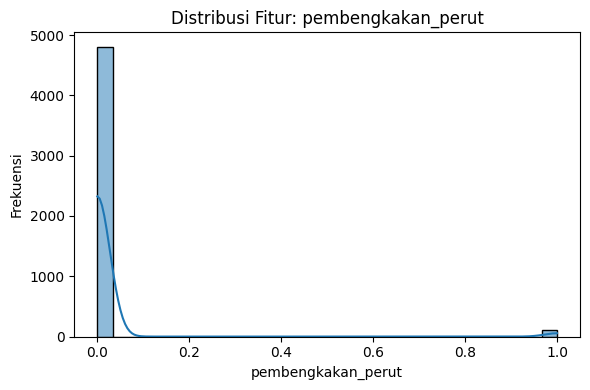

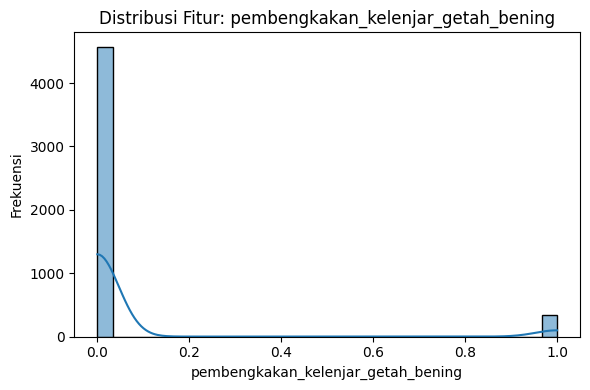

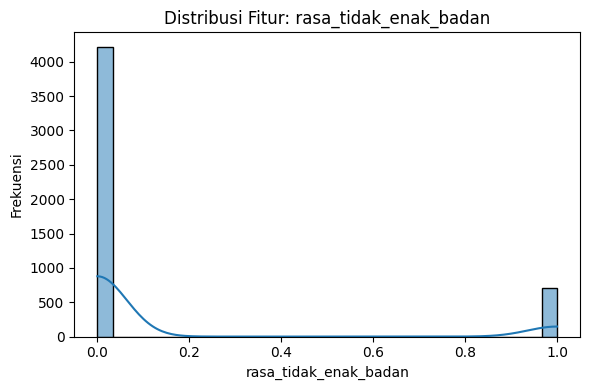

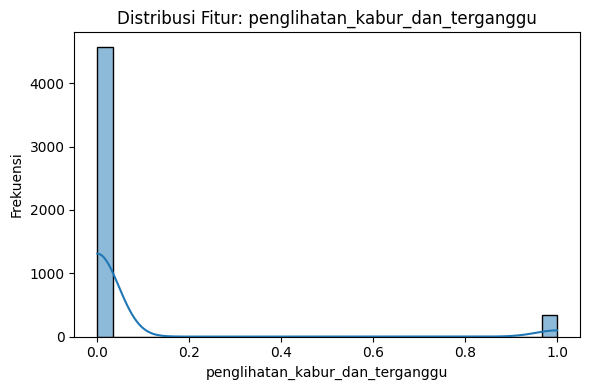

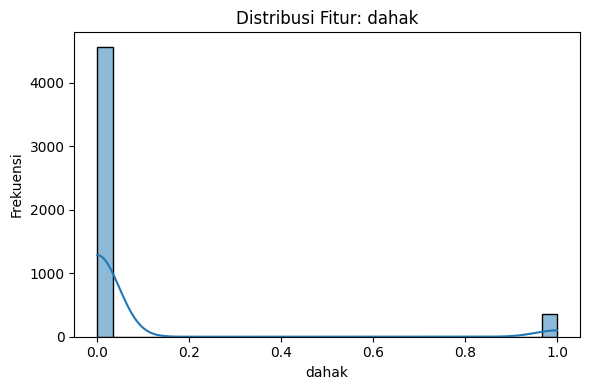

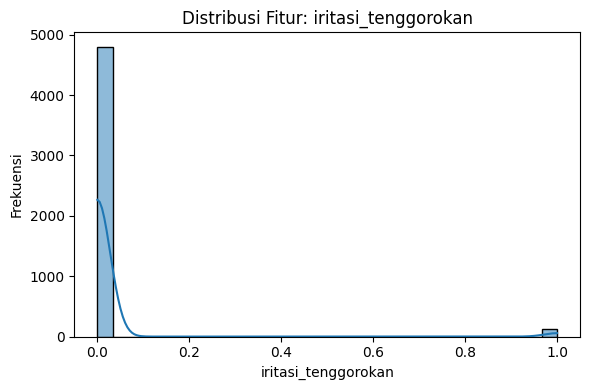

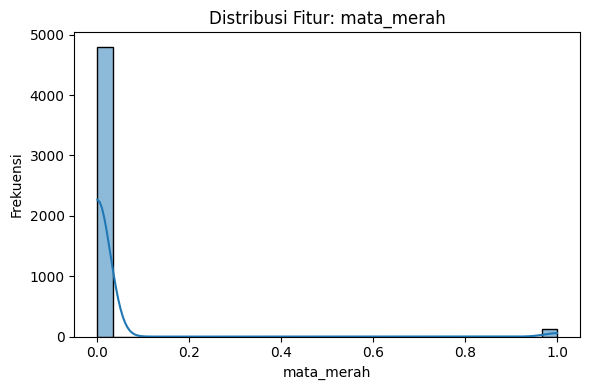

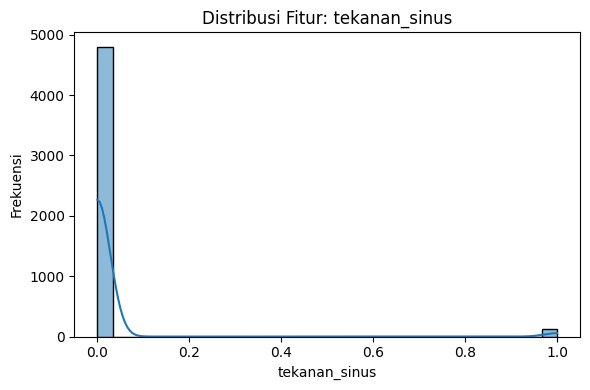

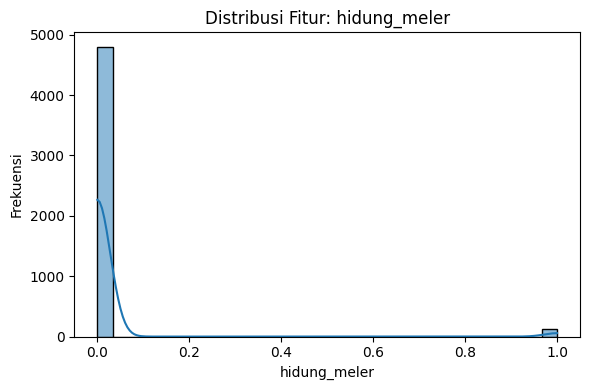

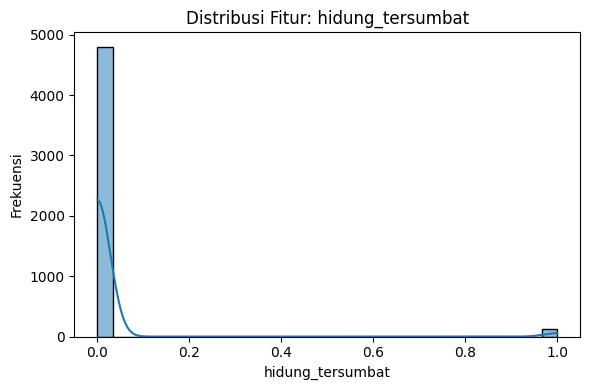

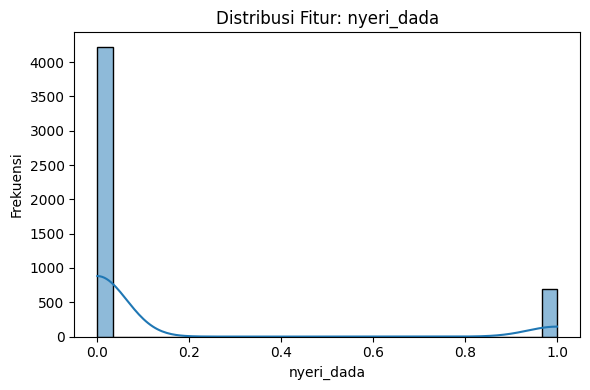

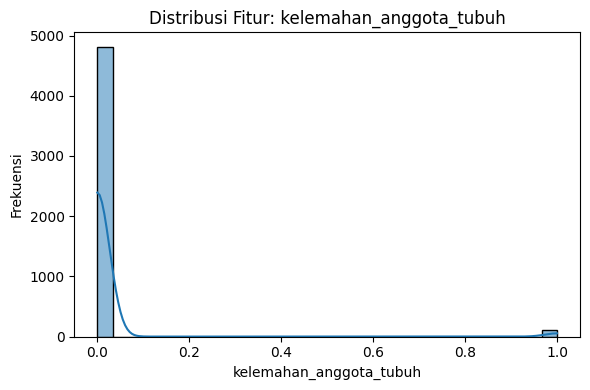

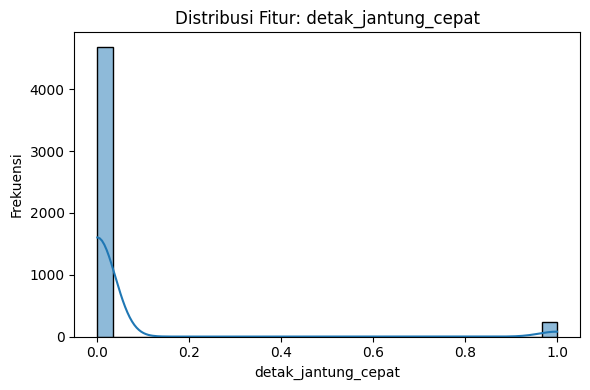

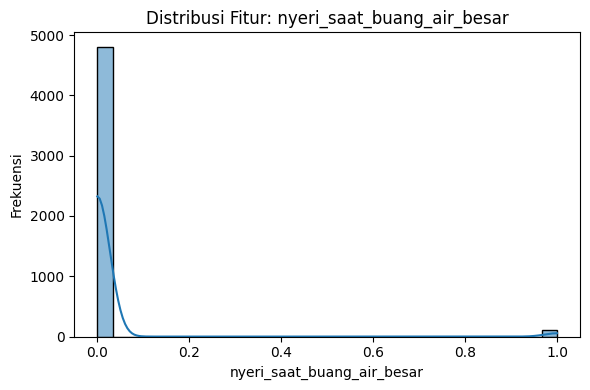

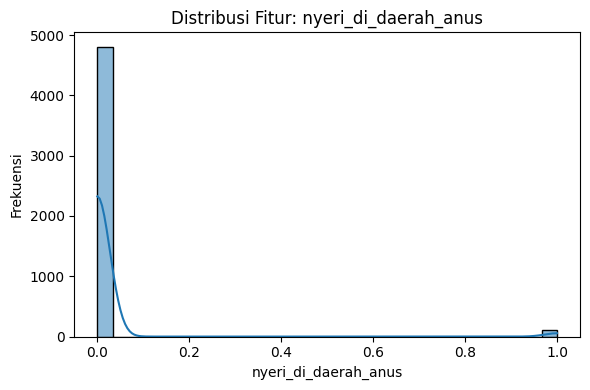

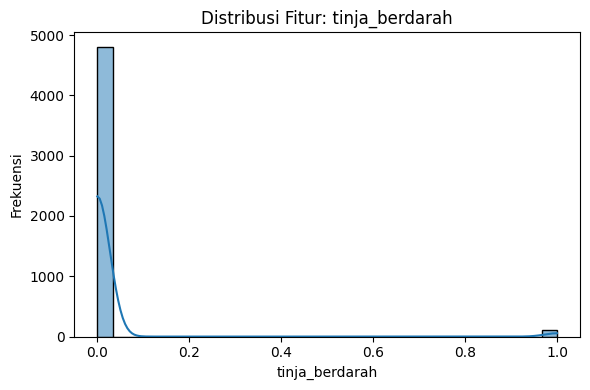

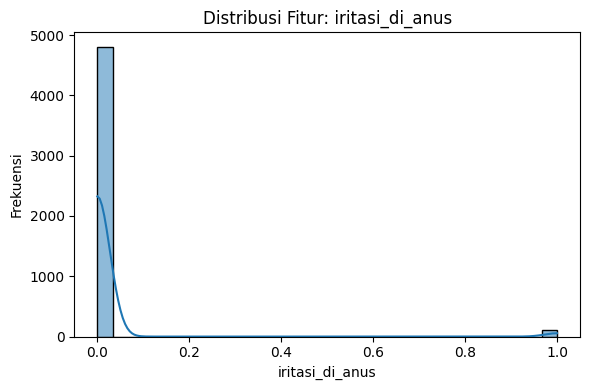

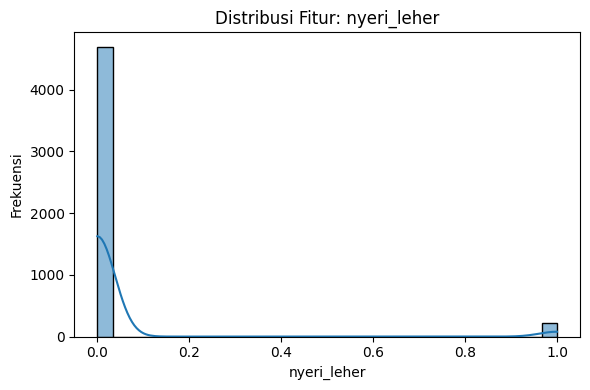

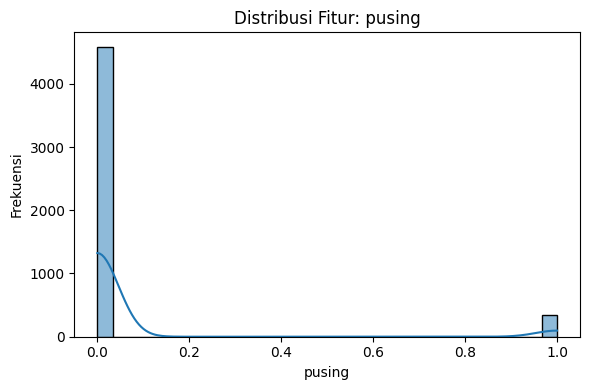

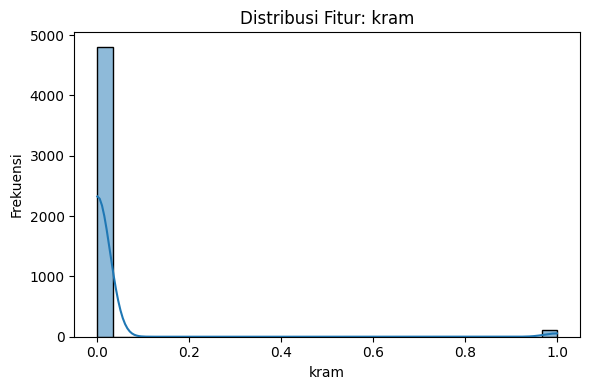

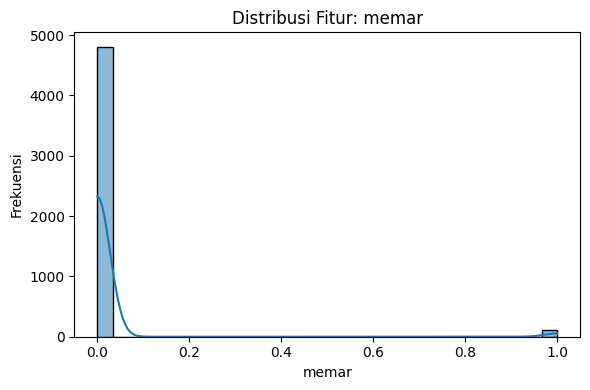

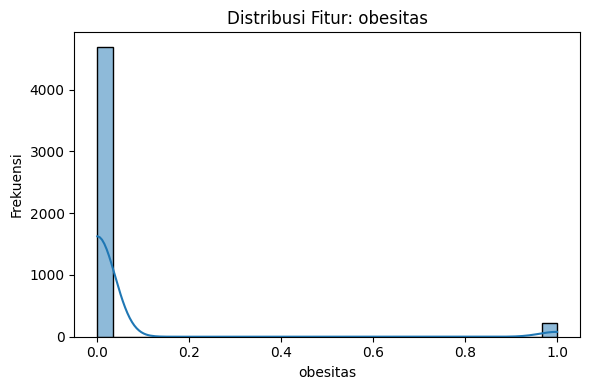

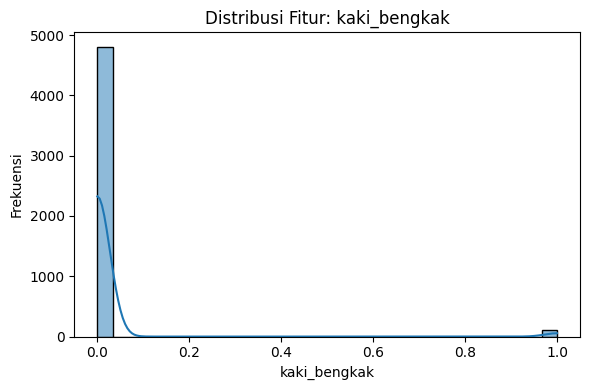

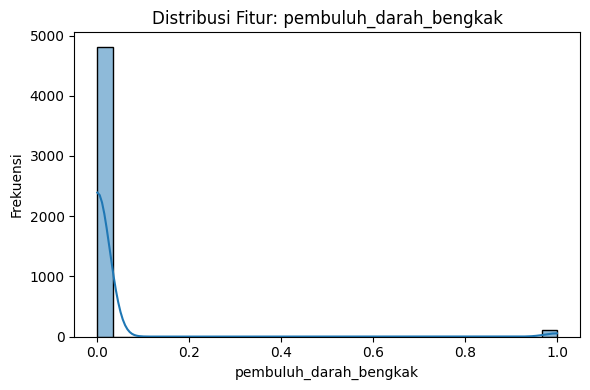

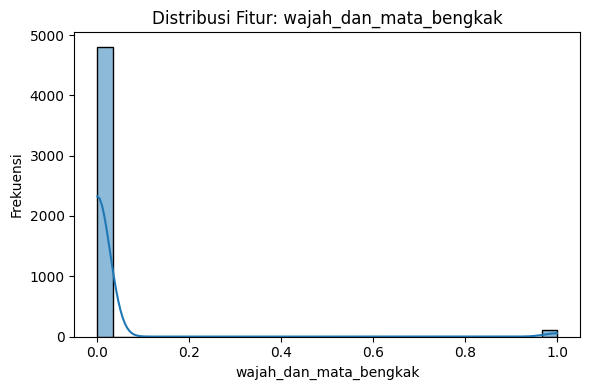

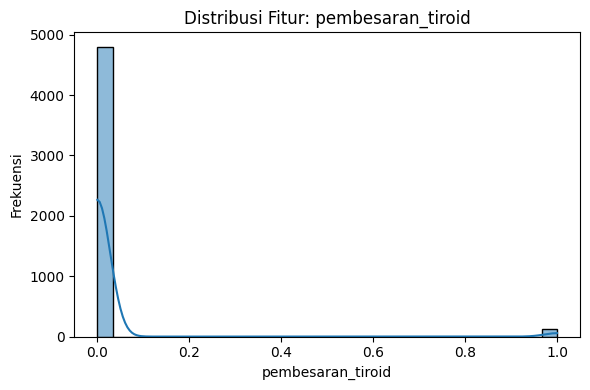

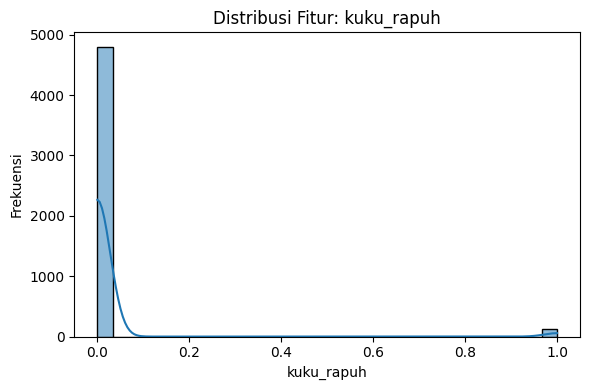

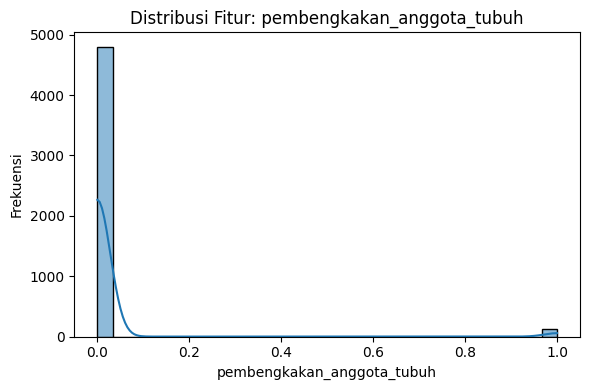

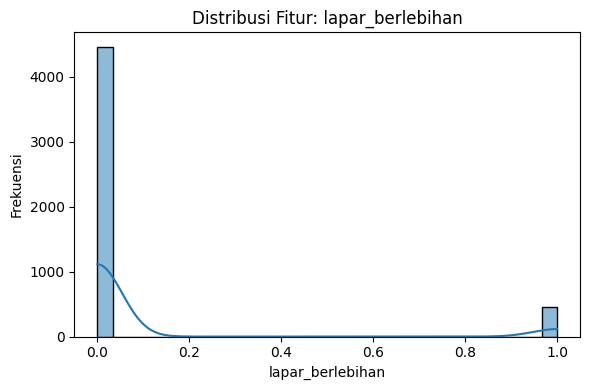

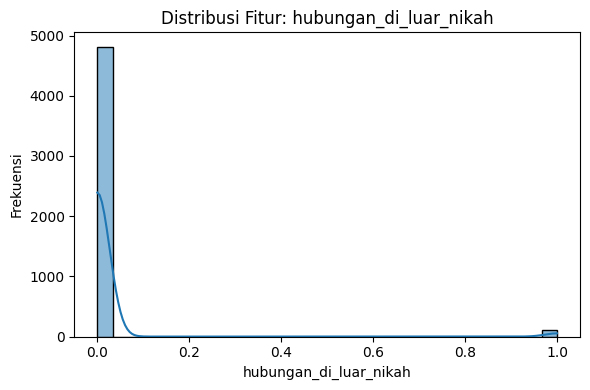

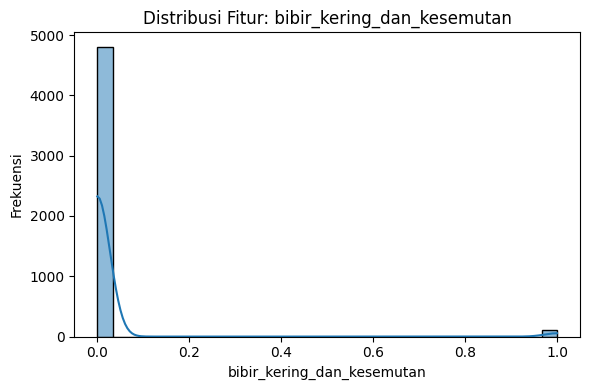

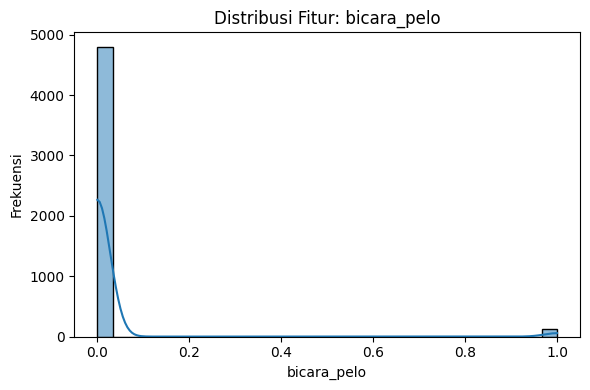

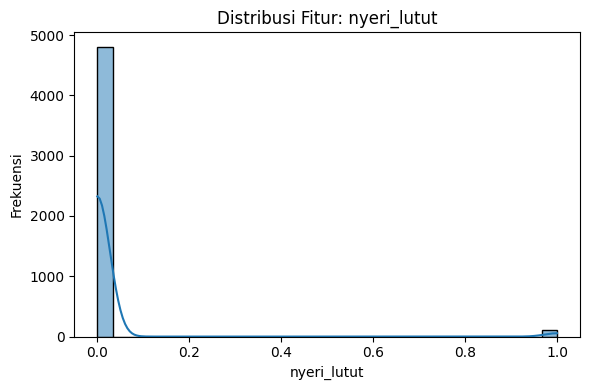

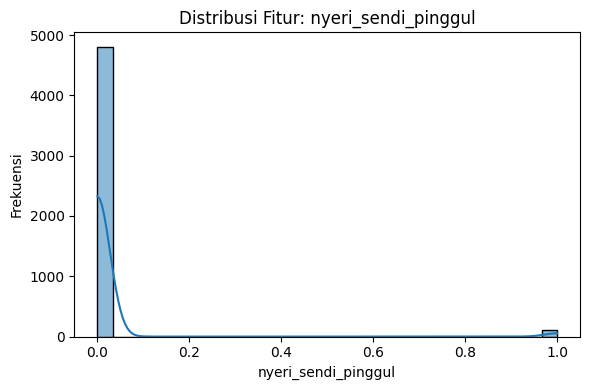

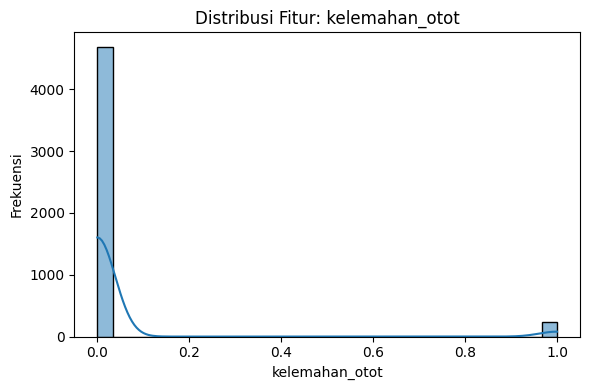

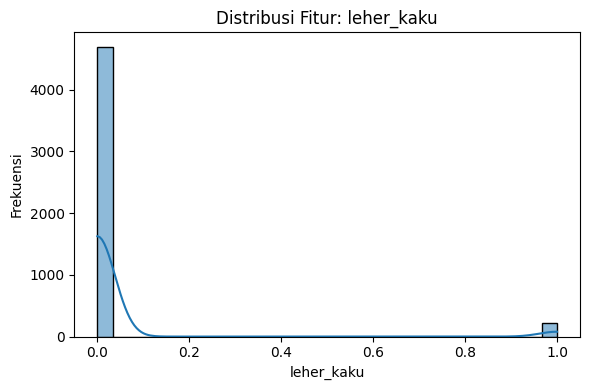

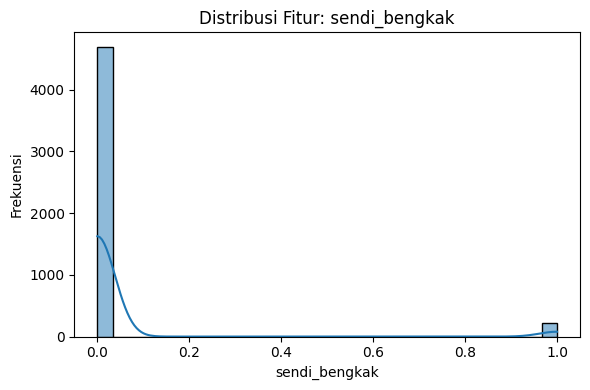

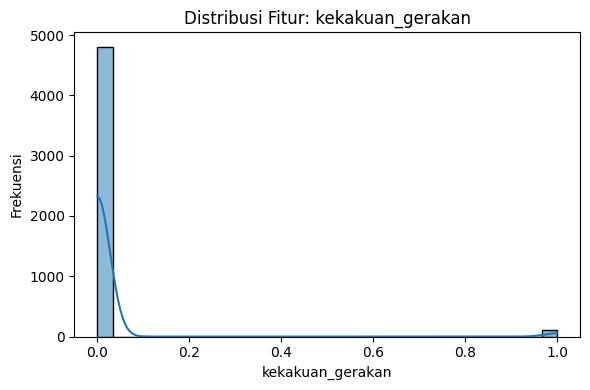

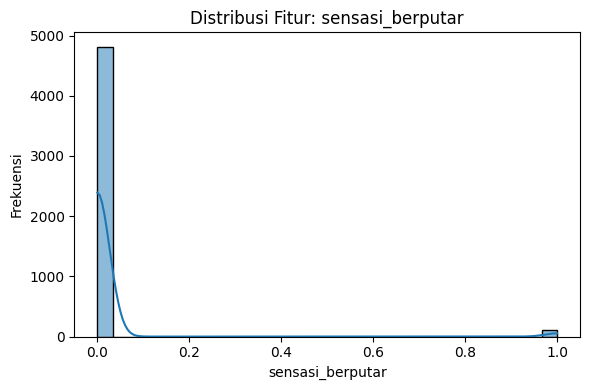

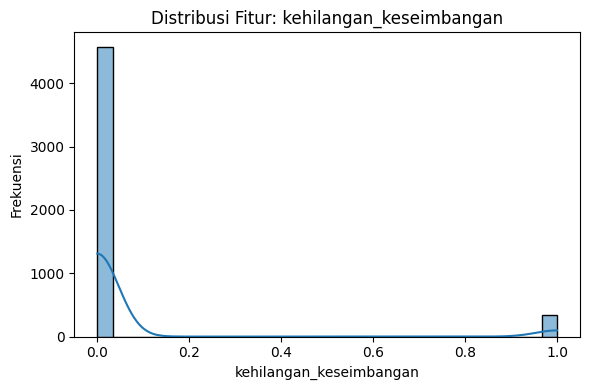

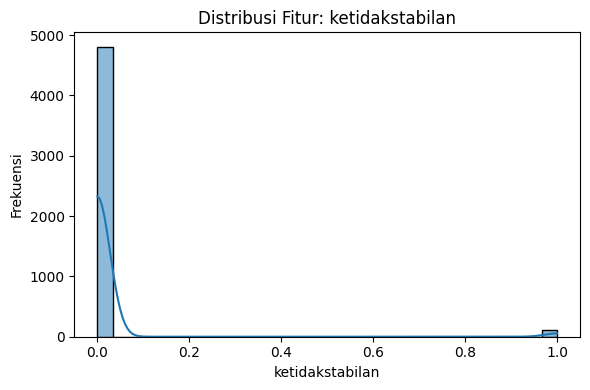

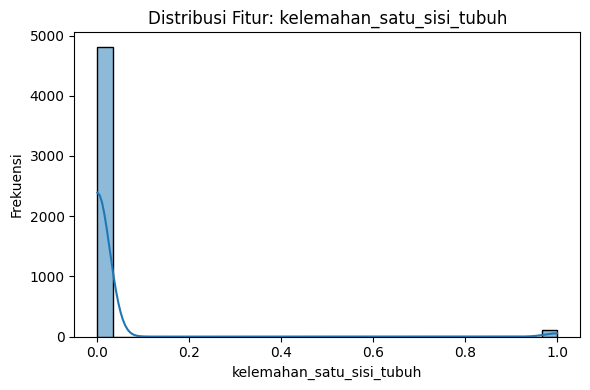

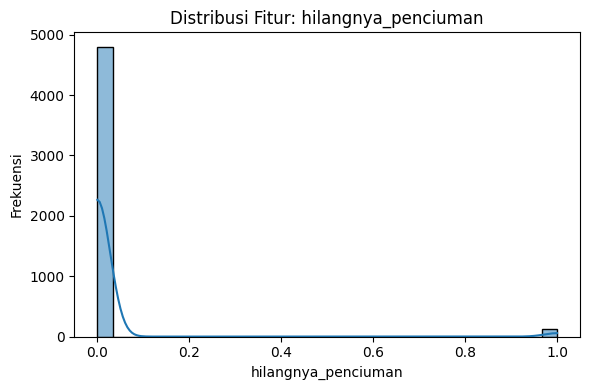

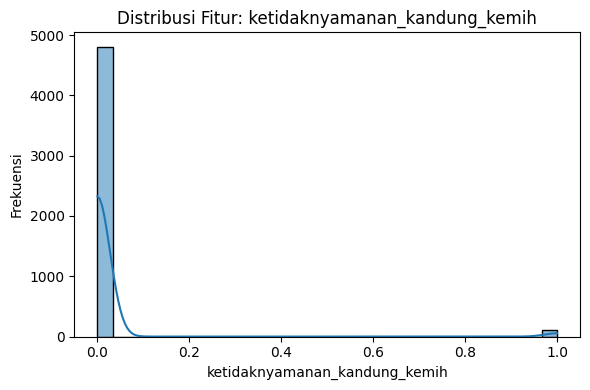

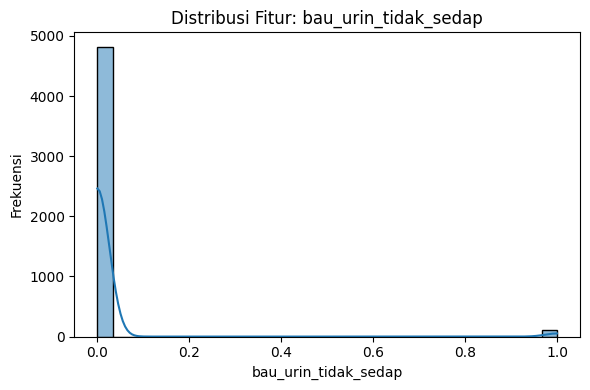

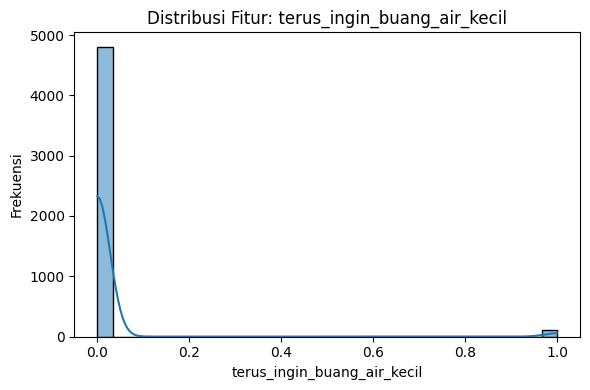

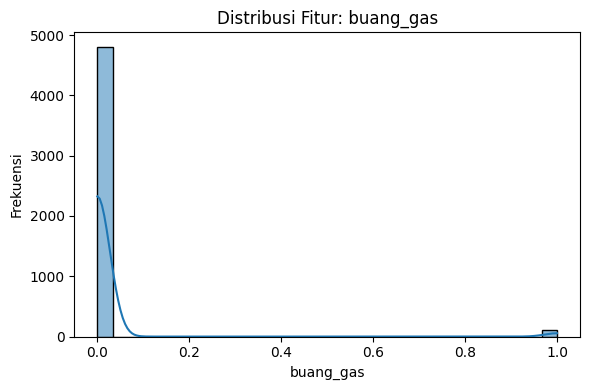

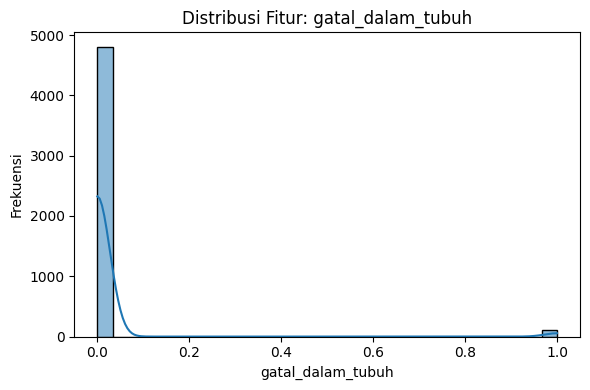

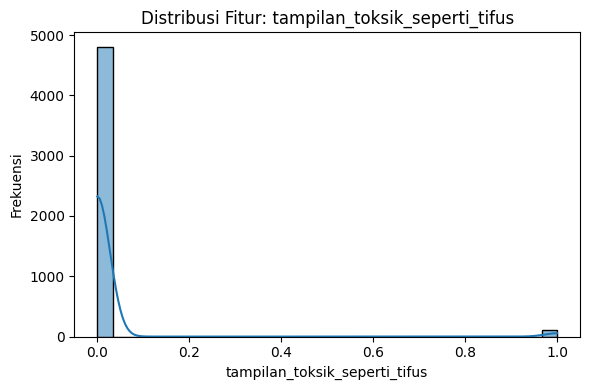

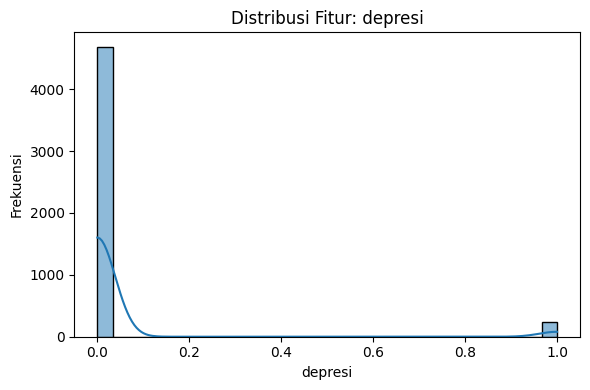

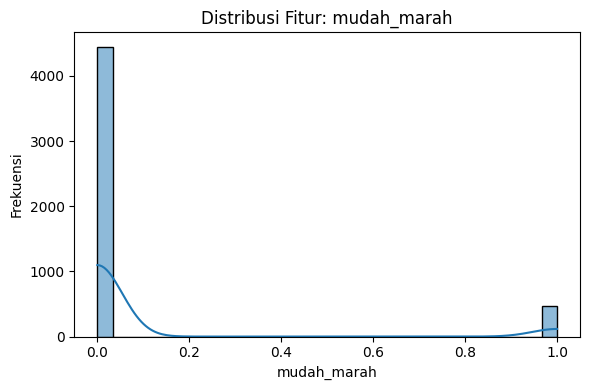

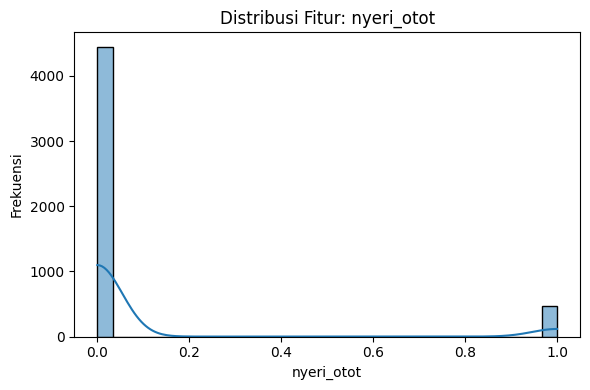

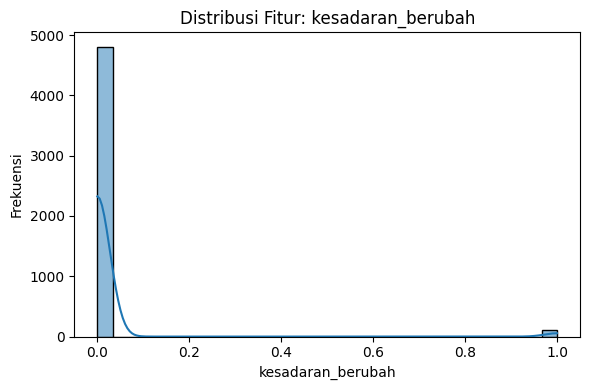

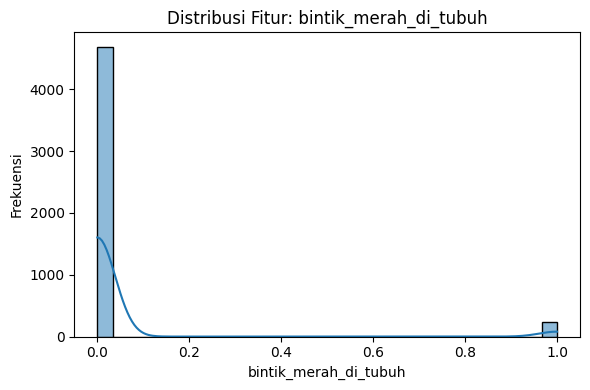

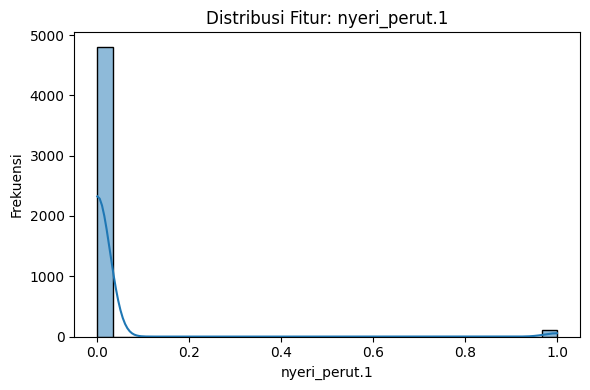

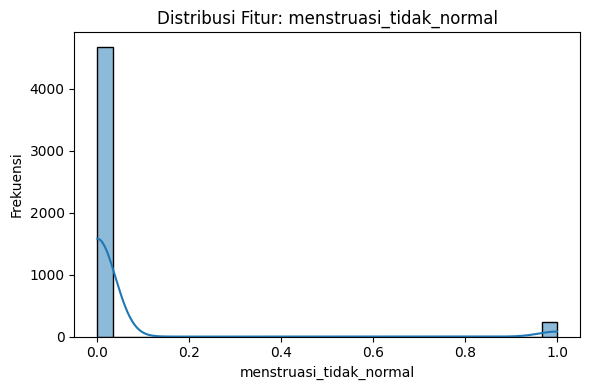

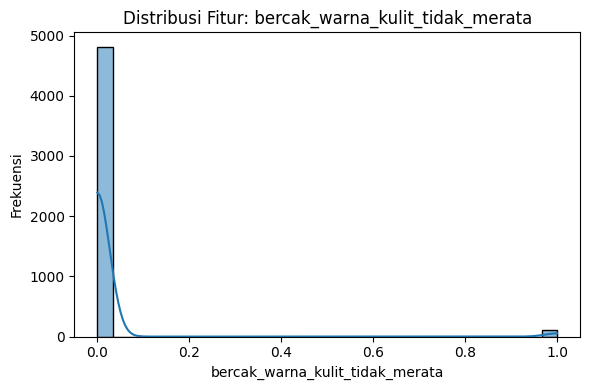

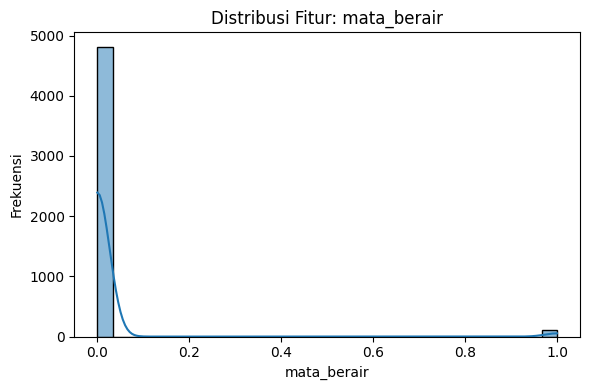

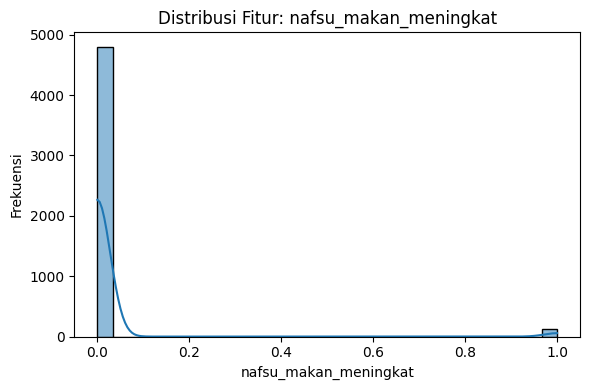

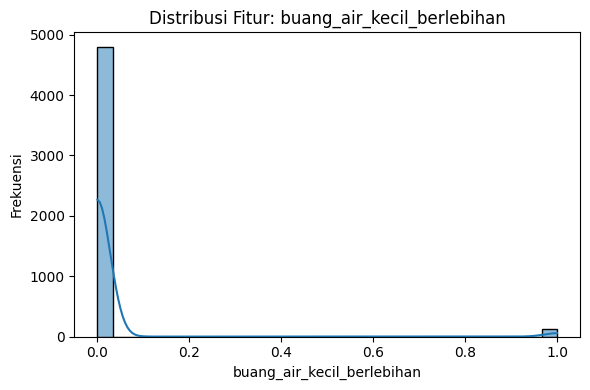

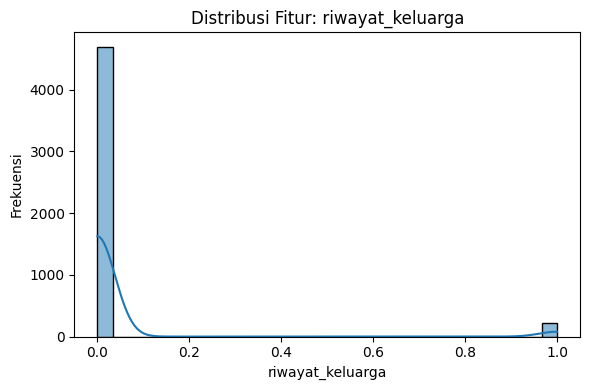

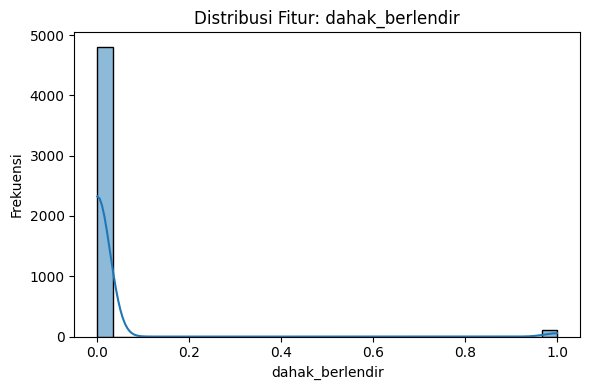

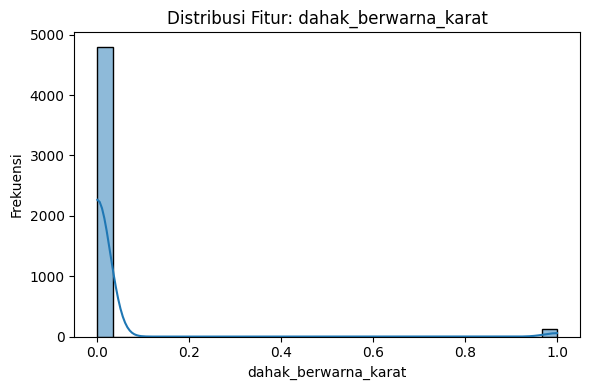

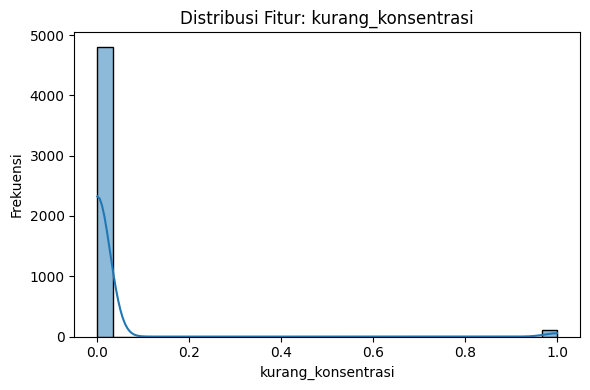

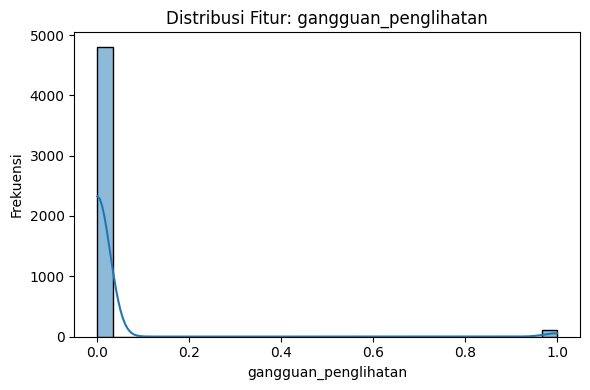

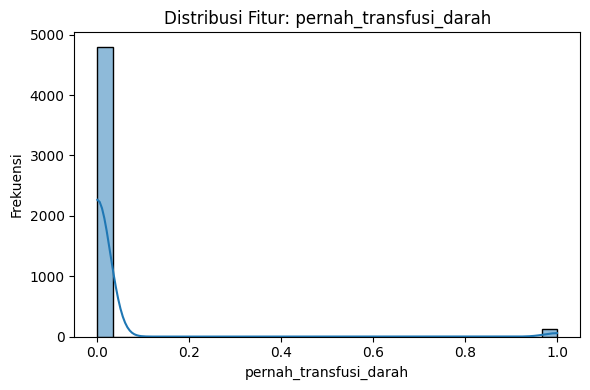

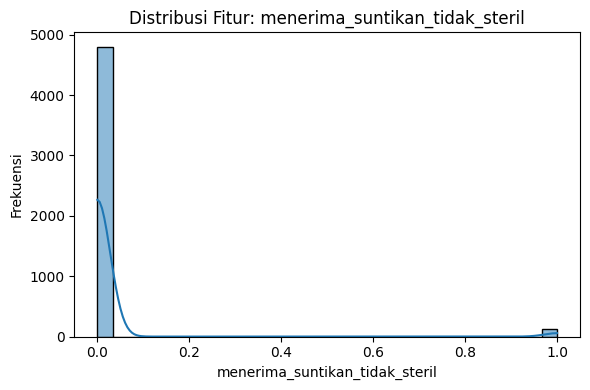

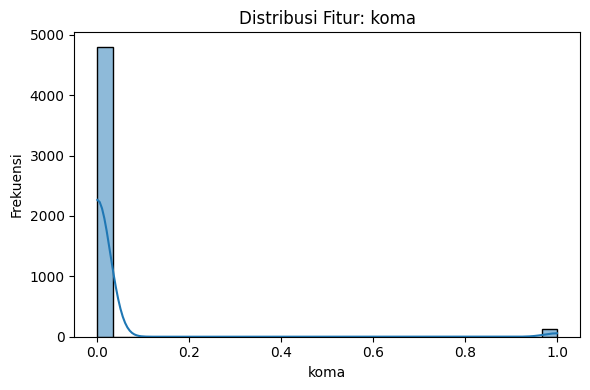

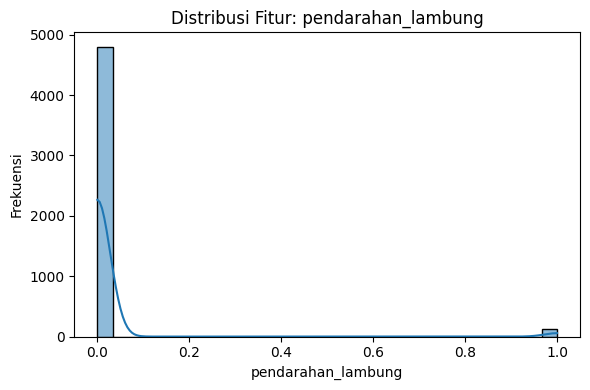

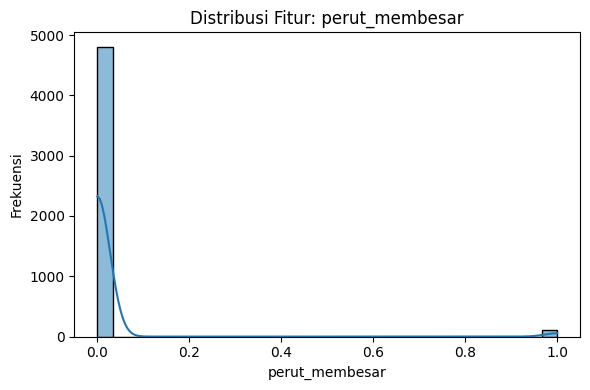

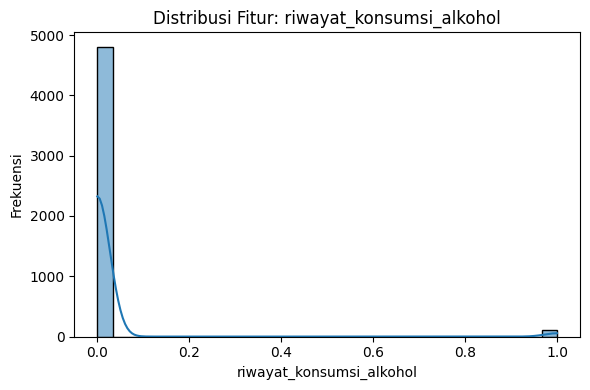

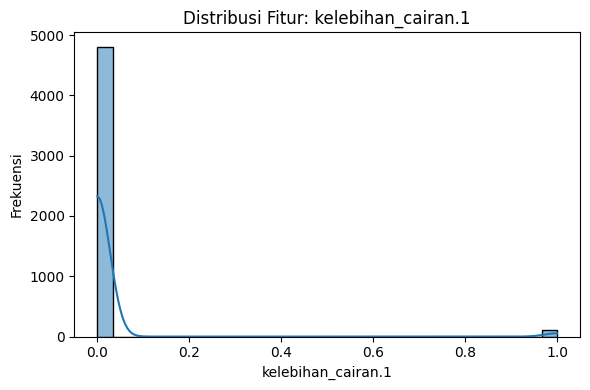

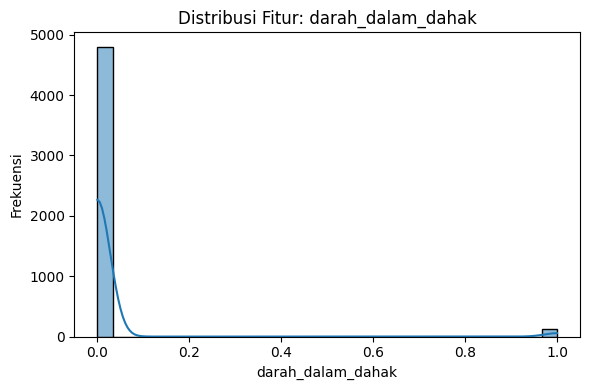

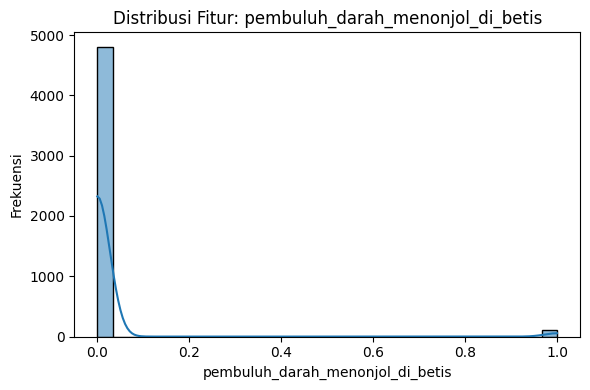

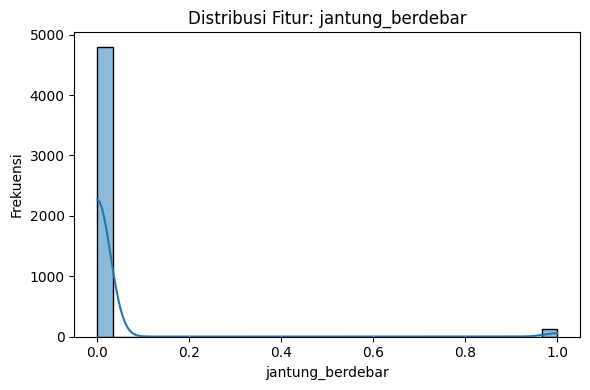

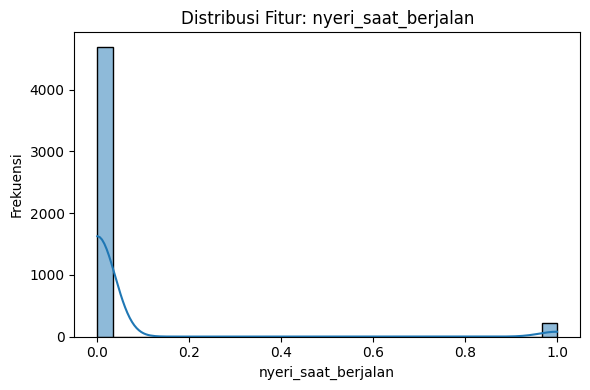

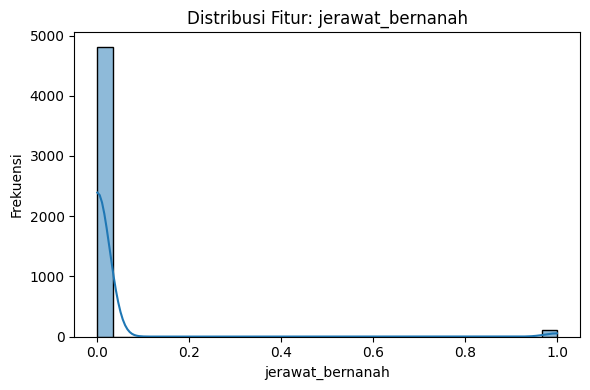

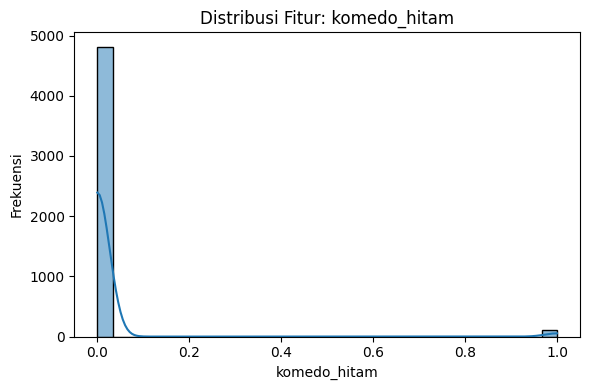

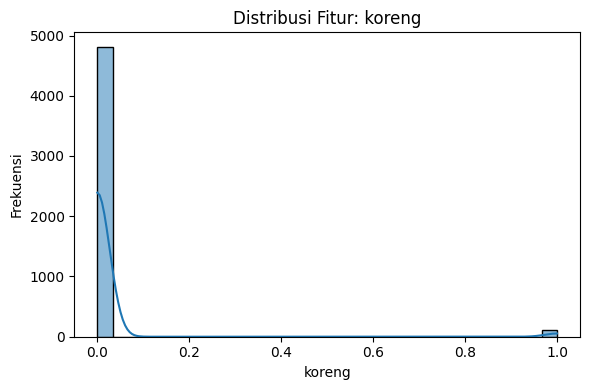

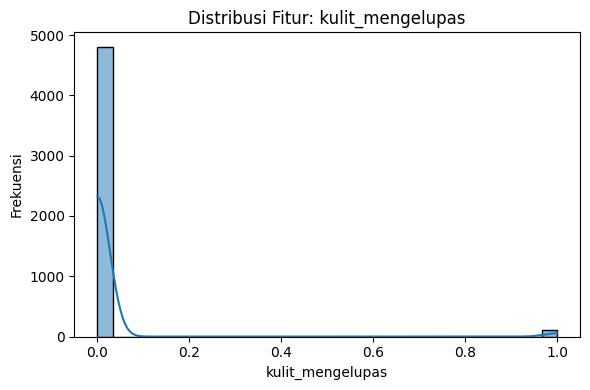

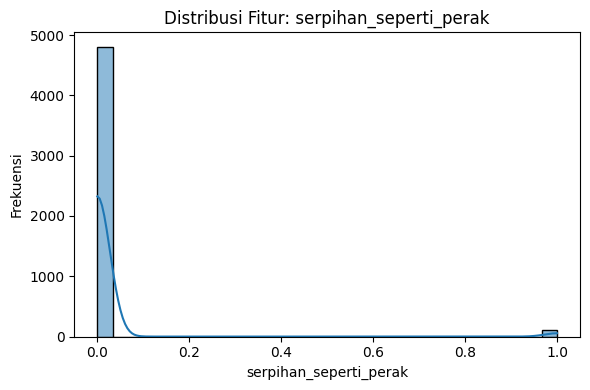

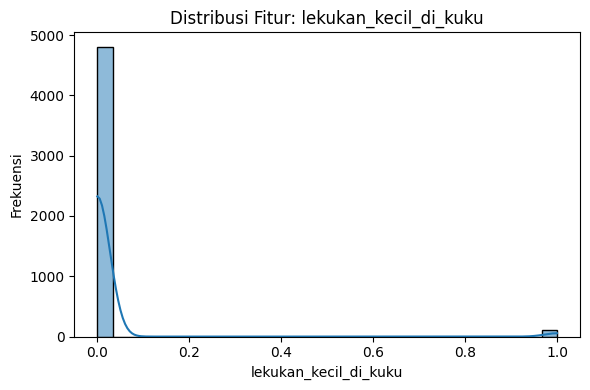

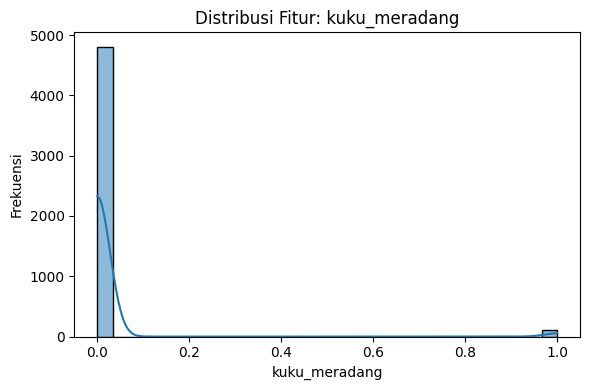

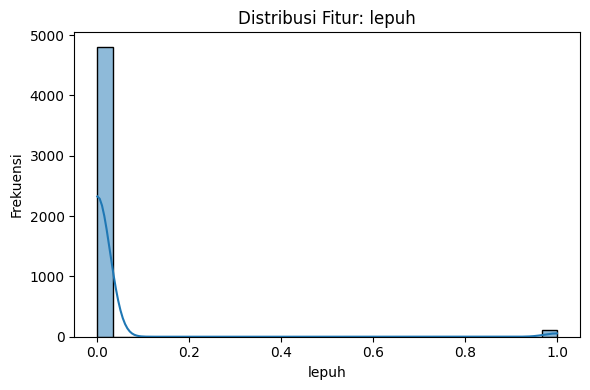

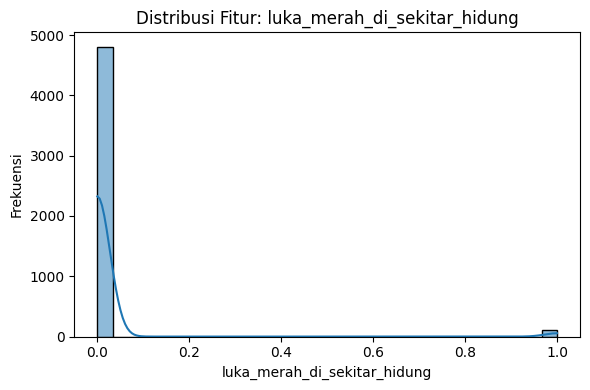

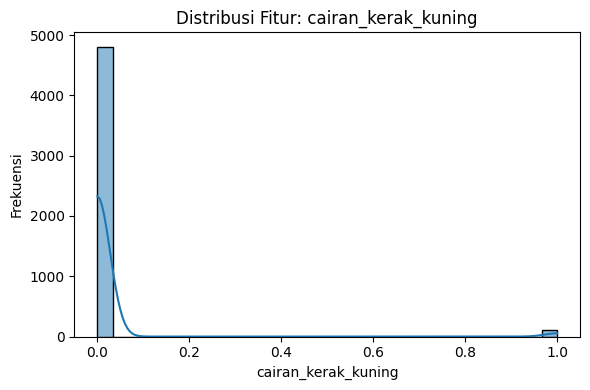

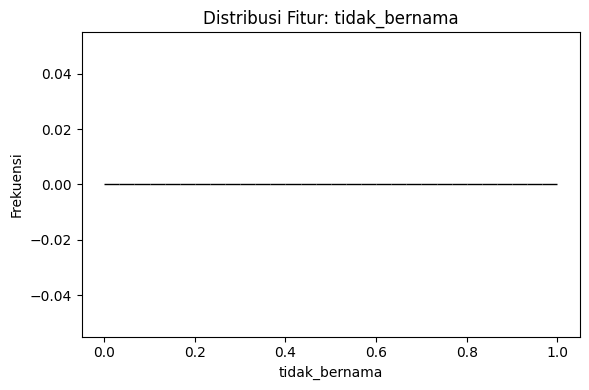

In [13]:
# 3.3 Histogram distribusi fitur numerik
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

# 4. DATA PREPARATION

In [14]:
# Hapus kolom 'tidak_bernama' jika ada
if 'tidak_bernama' in df.columns:
    df.drop(columns=['tidak_bernama'], inplace=True)

# Drop baris yang memiliki NaN pada target dan fitur
df.dropna(subset=[target_col], inplace=True)
df.dropna(inplace=True)

# Buang kelas dengan sampel < 2
counts = df[target_col].value_counts()
rare_classes = counts[counts < 2].index
if len(rare_classes) > 0:
    df = df[~df[target_col].isin(rare_classes)]

# Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode fitur kategori (jika ada)
for col in X.columns:
    if X[col].dtype == 'object':
        le_feat = LabelEncoder()
        X[col] = le_feat.fit_transform(X[col].astype(str))

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

selected_features = X.columns.tolist()

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. MODELLING

In [15]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=40, cv=cv_strategy,
    scoring='accuracy', random_state=42, n_jobs=-1, verbose=1
)

random_search.fit(X_train, y_train)

print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_

Fitting 10 folds for each of 40 candidates, totalling 400 fits

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best CV score: 1.0000


# 6. EVALUATION

In [16]:
# Predict test set
y_pred = best_model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAccuracy test set: {acc:.4f}")
print(f"F1-score (macro): {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

# Cross-validation score
cv_scores = cross_val_score(best_model, X, y_encoded, cv=cv_strategy, n_jobs=-1)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")



Accuracy test set: 1.0000
F1-score (macro): 1.0000

Classification Report:
                                        precision    recall  f1-score   support

(Vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        24
                                  AIDS       1.00      1.00      1.00        24
                                Alergi       1.00      1.00      1.00        24
                         Asma bronkial       1.00      1.00      1.00        24
                             Cacar air       1.00      1.00      1.00        24
                        Demam berdarah       1.00      1.00      1.00        24
                              Diabetes       1.00      1.00      1.00        24
                             Flu biasa       1.00      1.00      1.00        24
                                  GERD       1.00      1.00      1.00        24
                       Gastroenteritis       1.00      1.00      1.00        24
       Hemmorhoids dimorfik (tumpukan)     

# Visualisasi Evaluation

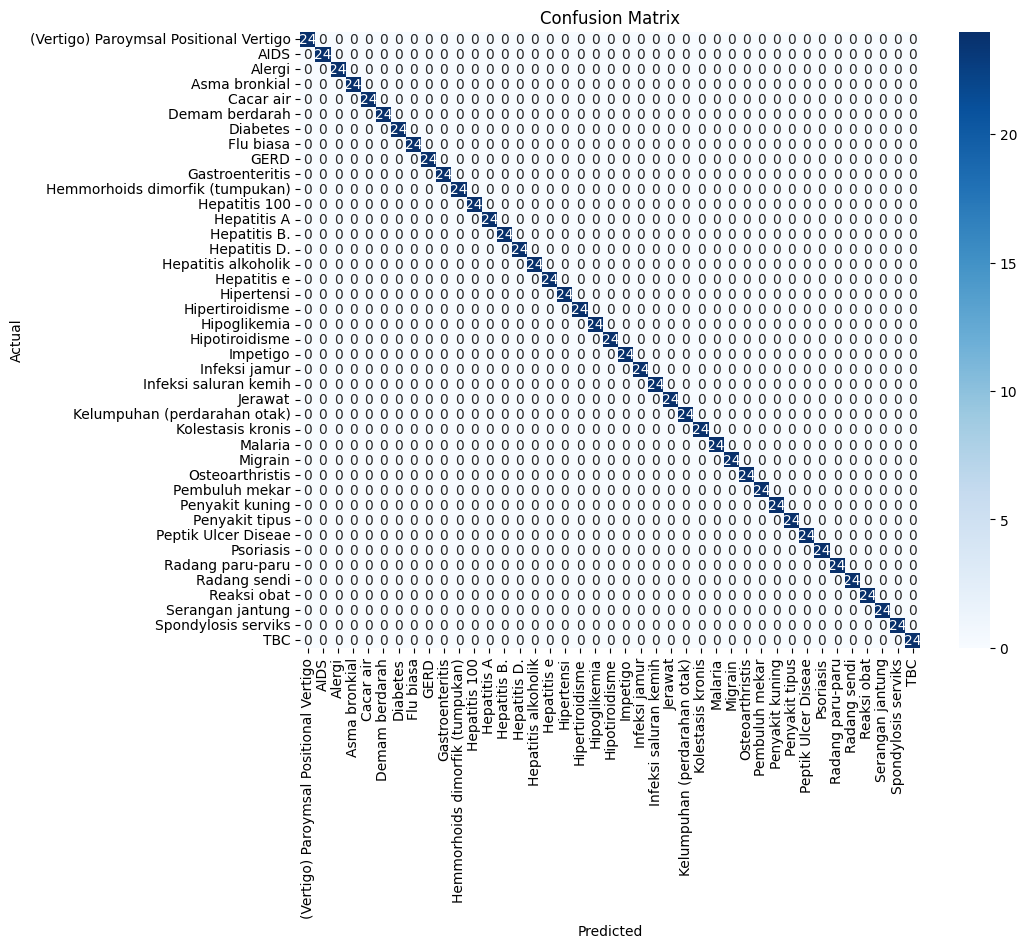

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 7. SAVE MODEL & METADATA

In [18]:
save_path = "/project/"
os.makedirs(save_path, exist_ok=True)

joblib.dump(best_model, f'{save_path}/train1_model_v2.joblib')
joblib.dump(le, f'{save_path}/label_train_v2.joblib')

with open(f'{save_path}/selected_gejala_v2.json', 'w') as f:
    json.dump(selected_features, f)

info = {
    "num_features": X.shape[1],
    "num_samples": len(y_encoded),
    "best_params": random_search.best_params_,
    "class_distribution": {int(k): v for k, v in Counter(y_encoded).items()}
}

with open(f'{save_path}/training_info_v3.json', 'w') as f:
    json.dump(info, f)

print(f"\n✅ Model, label encoder, fitur, dan metadata berhasil disimpan di: {save_path}")


✅ Model, label encoder, fitur, dan metadata berhasil disimpan di: /project/


--- ---

--- ---

--- ---

## TEST : DATA PREDIKSI

In [20]:
import json
import pandas as pd
import joblib

# Load model dan encoder
model = joblib.load('train1_model_v2.joblib')
le = joblib.load('label_train_v2.joblib')

# Load fitur penting
with open('selected_gejala_v2.json', 'r') as f:
    feature_columns = json.load(f)

print("=== Prediksi Penyakit dari Gejala ===")

answer = input("Apakah Anda ingin memasukkan gejala? (Ya/Tidak): ").strip().lower()

if answer == 'ya':
    print("\nPilih gejala yang Anda alami (max 5 gejala):")
    for i, feat in enumerate(feature_columns, 1):
        print(f"{i}. {feat}")

    input_str = input("\nMasukkan nomor gejala (pisahkan dengan koma, misal 1,3,5): ")
    selected_indices = [int(x.strip()) - 1 for x in input_str.split(",") if x.strip().isdigit()]

    if len(selected_indices) < 1:
        print("Harap masukkan minimal 1 gejala.")
        exit()
    if len(selected_indices) > 5:
        print("Maksimal 5 gejala saja yang dapat diproses.")
        exit()

    input_dict = {feat: 0 for feat in feature_columns}
    for idx in selected_indices:
        if 0 <= idx < len(feature_columns):
            input_dict[feature_columns[idx]] = 1

    input_vector = [input_dict[col] for col in feature_columns]
    input_df = pd.DataFrame([input_vector], columns=feature_columns)

    probs = model.predict_proba(input_df)[0]
    top_n = 3
    top_indices = probs.argsort()[-top_n:][::-1]

    print("\n=== Hasil Prediksi Penyakit (Top kemungkinan) ===")
    for i in top_indices:
        label = le.inverse_transform([i])[0]
        print(f"{label.upper()} dengan probabilitas {probs[i]:.2f}")

else:
    print("Baik, tidak ada input gejala diberikan. Program selesai.")


=== Prediksi Penyakit dari Gejala ===

Pilih gejala yang Anda alami (max 5 gejala):
1. gatal
2. ruam_kulit
3. bintil_pada_kulit
4. bersin_terus_menerus
5. menggigil
6. meriang
7. nyeri_sendi
8. sakit_perut
9. asam_lambung
10. sariawan_di_lidah
11. penyusutan_otot
12. muntah
13. nyeri_saat_buang_air_kecil
14. bercak_darah_saat_buang_air_kecil
15. kelelahan
16. kenaikan_berat_badan
17. cemas
18. tangan_dan_kaki_dingin
19. perubahan_suasana_hati
20. penurunan_berat_badan
21. gelisah
22. lesu
23. bercak_di_tenggorokan
24. kadar_gula_tidak_stabil
25. batuk
26. demam_tinggi
27. mata_cekung
28. sesak_napas
29. berkeringat
30. dehidrasi
31. gangguan_pencernaan
32. sakit_kepala
33. kulit_kekuningan
34. urin_gelap
35. mual
36. hilang_nafsu_makan
37. nyeri_di_belakang_mata
38. nyeri_punggung
39. sembelit
40. nyeri_perut
41. diare
42. demam_ringan
43. urin_kuning
44. mata_menguning
45. gagal_hati_akut
46. kelebihan_cairan
47. pembengkakan_perut
48. pembengkakan_kelenjar_getah_bening
49. rasa_tidak

c:\Users\crism\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
